# Fire

In [ ]:
## DF description

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:


fire_path = "/content/drive/MyDrive/data_set/fire/dzd_tun_fire.csv"
fire_df = pd.read_csv(fire_path)


fire_df.head()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0  27.72818    9.87200      295.51  0.76   0.77  2024-01-01         3   
1  28.63288    9.77909      301.80  0.79   0.78  2024-01-01         3   
2  28.64012    9.77953      298.65  0.79   0.78  2024-01-01         3   
3  36.74886    6.25409      338.04  0.46   0.39  2024-01-01       141   
4  35.87978    4.44782      309.49  0.41   0.37  2024-01-01       141   

  satellite instrument confidence  version  bright_ti5   frp daynight  type  \
0       N20      VIIRS          n        2      277.66  1.24        N     2   
1       N20      VIIRS          n        2      277.05  1.57        N     2   
2       N20      VIIRS          n        2      277.04  1.34        N     2   
3       N20      VIIRS          n        2      257.28  5.21        N     2   
4       N20      VIIRS          n        2      272.08  1.58        N     2   

   country  
0  Algeria  
1  Algeria  
2  Algeria  
3  Algeria  
4  Algeria

In [ ]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90250 entries, 0 to 90249
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    90250 non-null  float64
 1   longitude   90250 non-null  float64
 2   bright_ti4  90250 non-null  float64
 3   scan        90250 non-null  float64
 4   track       90250 non-null  float64
 5   acq_date    90250 non-null  object 
 6   acq_time    90250 non-null  int64  
 7   satellite   90250 non-null  object 
 8   instrument  90250 non-null  object 
 9   confidence  90250 non-null  object 
 10  version     90250 non-null  int64  
 11  bright_ti5  90250 non-null  float64
 12  frp         90250 non-null  float64
 13  daynight    90250 non-null  object 
 14  type        90250 non-null  int64  
 15  country     90250 non-null  object 
dtypes: float64(7), int64(3), object(6)
memory usage: 11.0+ MB


In [ ]:
fire_df.describe()


latitude     longitude    bright_ti4          scan         track      acq_time  version    bright_ti5           frp          type
count  90250.000000  90250.000000  90250.000000  90250.000000  90250.000000  90250.000000  90250.0  90250.000000  90250.000000  90250.000000
mean      31.476760      6.280033    321.091793      0.475991      0.515446    380.331623      2.0    291.726092      3.447776      1.690936
std        2.666477      2.593748     18.205551      0.101596      0.126508    480.710563      0.0     11.700269      5.222111      0.735207
min       19.603230     -8.118050    240.170000      0.320000      0.360000      0.000000      2.0    244.790000      0.060000      0.000000
25%       28.911510      5.642160    305.380000      0.400000      0.390000     59.000000      2.0    282.900000      1.150000      2.000000
50%       31.409125      6.557880    316.710000      0.450000      0.490000    140.000000      2.0    290.790000      2.060000      2.000000
75%       32.560313      8.083758    337.400000      0.540000      0.620000    232.000000      2.0    298.100000      3.920000      2.000000
max       37.323460     11.110350    367.000000      0.800000      0.780000   1410.000000      2.0    355.420000    251.890000      3.000000

## Missing values

In [ ]:
missing_counts = fire_df.isna().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
country       0
dtype: int64


In [ ]:
## Categorical features

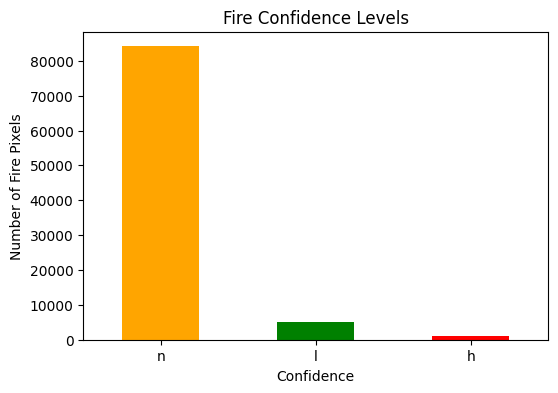

In [ ]:
conf_counts = fire_df['confidence'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
conf_counts.plot(kind='bar', color=['orange','green','red'])
plt.xlabel("Confidence")
plt.ylabel("Number of Fire Pixels")
plt.title("Fire Confidence Levels")
plt.xticks(rotation=0)
plt.show()

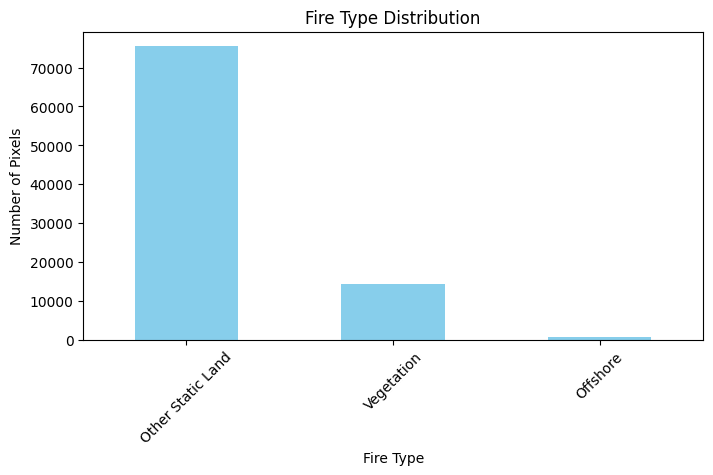

In [ ]:
# Make a copy of the original DataFrame
fire_copy = fire_df.copy()

# Map type codes to labels
type_labels = {
    0: "Vegetation",
    1: "Active Volcano",
    2: "Other Static Land",
    3: "Offshore"
}
fire_copy['type_label'] = fire_copy['type'].map(type_labels)

# Count occurrences
type_counts = fire_copy['type_label'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,4))
type_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Fire Type")
plt.ylabel("Number of Pixels")
plt.title("Fire Type Distribution")
plt.xticks(rotation=45)
plt.show()



In [ ]:
# for correlation vegetation and nominal >>>>>  they inflate the chi square

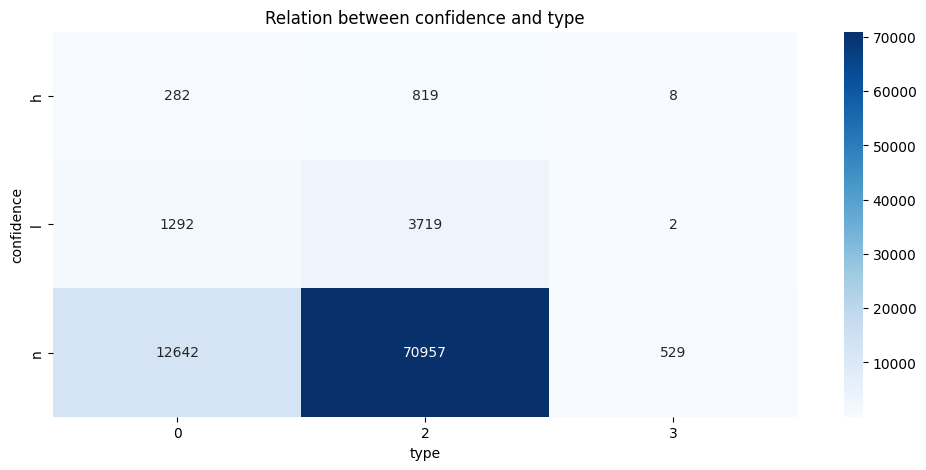

In [ ]:
cross = pd.crosstab(fire_df['confidence'], fire_df['type'])

# Heatmap
plt.figure(figsize=(12,5))
sns.heatmap(cross, annot=True, fmt='d', cmap='Blues')
plt.title("Relation between confidence and type")
plt.ylabel("confidence")
plt.xlabel("type")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, chi2

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(cross)

# Compute critical value (95% confidence)
critical_value = chi2.ppf(0.95, dof)

# Print results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("Critical value (95% confidence):", critical_value)
print("p-value:", p_value)


#small p-value --> higher chance of being associated
#the probability that you could see a difference this big (or bigger) just by random chance — if the two things were actually unrelated.
# ex p<0.05 proba <5% that the pattern ahppened by luck


# X^2 >>> critical value --> significant relationship

Chi-square statistic: 512.5752004647082
Degrees of freedom: 4
Critical value (95% confidence): 9.487729036781154
p-value: 1.2768159378088886e-109


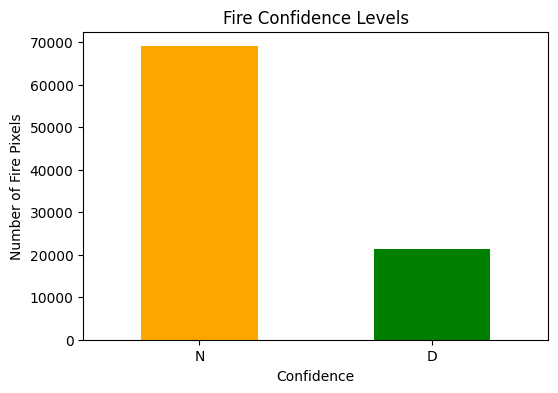

In [ ]:
conf_counts = fire_df['daynight'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
conf_counts.plot(kind='bar', color=['orange','green'])
plt.xlabel("Day / night")
plt.ylabel("Number of Fire Pixels")
plt.title("FDay / Night")
plt.xticks(rotation=0)
plt.show()

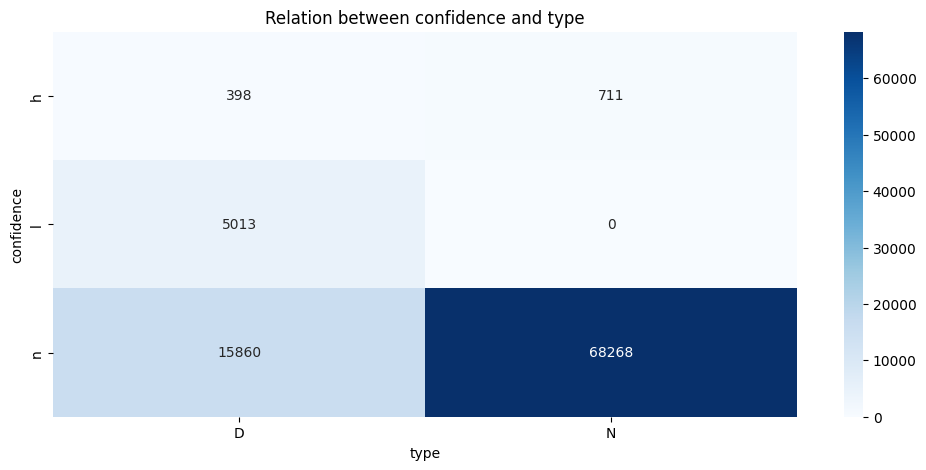

In [ ]:
cross = pd.crosstab(fire_df['confidence'], fire_df['daynight'])

# Heatmap
plt.figure(figsize=(12,5))
sns.heatmap(cross, annot=True, fmt='d', cmap='Blues')
plt.title("Relation between confidence and type")
plt.ylabel("confidence")
plt.xlabel("type")
plt.show()

## Numerical atributes

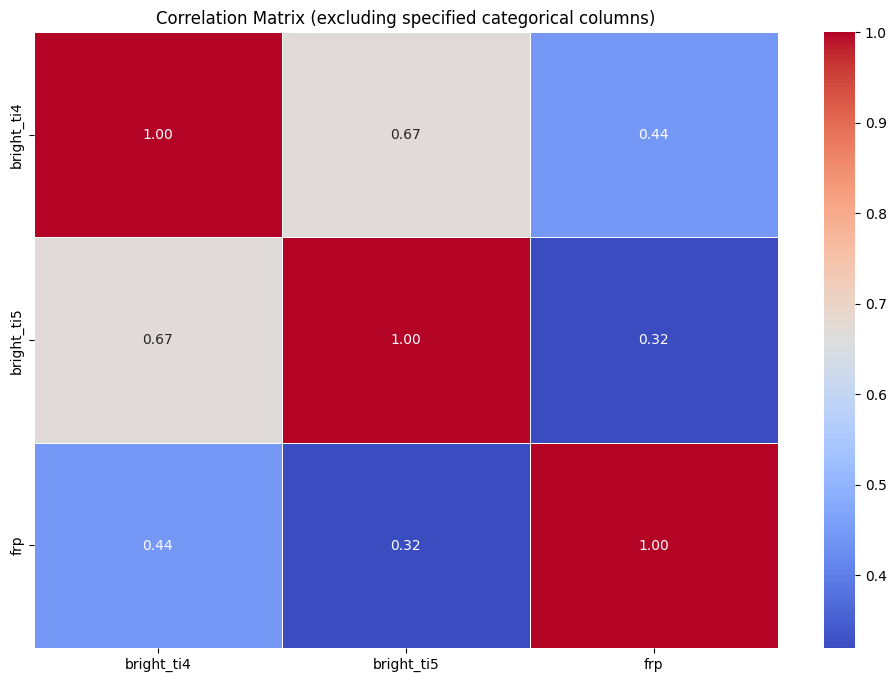

In [ ]:
cols = ['bright_ti4', 'bright_ti5', 'frp']
corr_matrix = fire_copy[cols].corr()
# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (excluding specified categorical columns)")
plt.show()



In [ ]:
## OUTLIERS FRP __> INTENCE FIRES

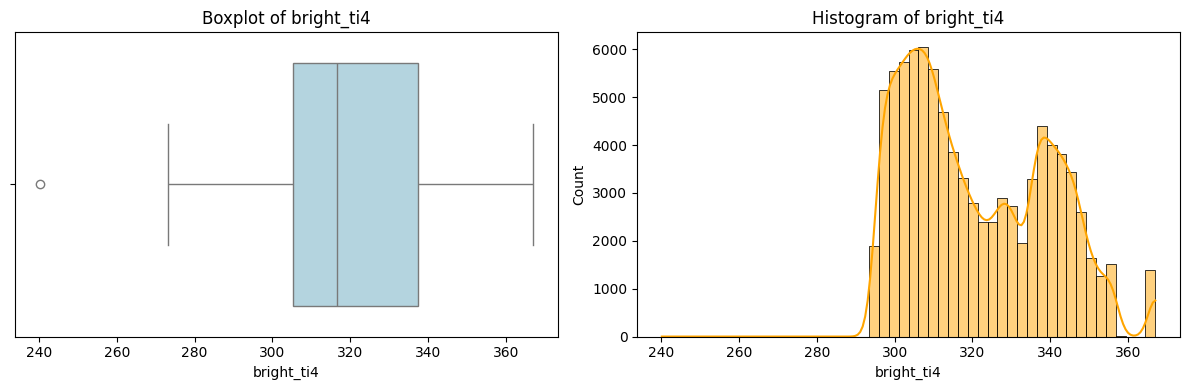

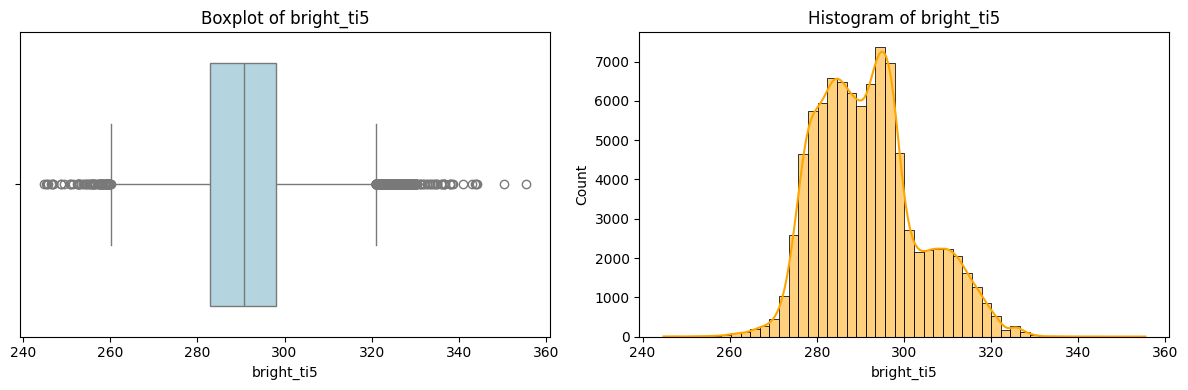

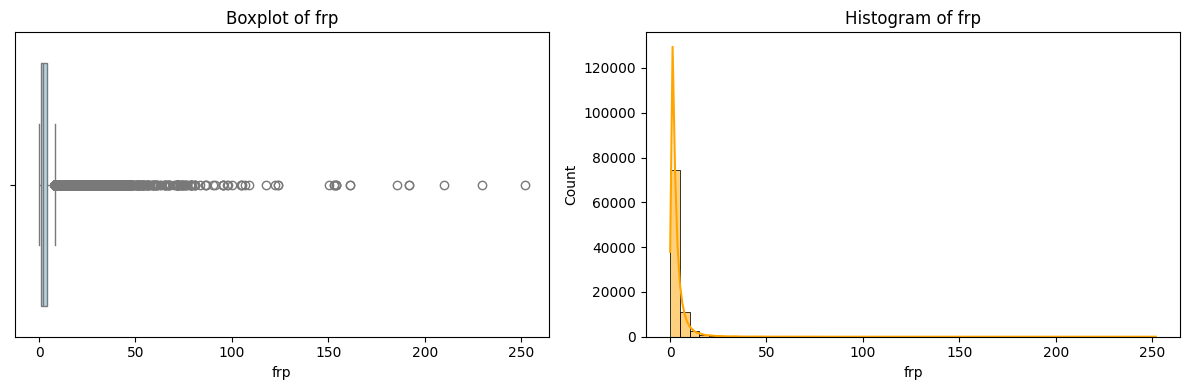

In [ ]:
# Attributes to plot
attrs = ['bright_ti4', 'bright_ti5', 'frp']

for col in attrs:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # Boxplot
    sns.boxplot(x=fire_copy[col], ax=axes[0], color='lightblue')
    axes[0].set_title(f'Boxplot of {col}')

    # Histogram
    sns.histplot(fire_copy[col], bins=50, kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

**Brightness (TI4/TI5)** shows pixel-level intensity

**FRP** Fire Radiative Power (MW - megawatts)	Depicts the pixel-integrated fire radiative power in MW (megawatts).

# Soil

## Reading DB + feature extraction

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 47.5 MB/s eta 0:00:00


In [ ]:
!apt-get install -y mdbtools


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmdb3 libmdbsql3
Suggested packages:
  bash-completion
The following NEW packages will be installed:
  libmdb3 libmdbsql3 mdbtools
0 upgraded, 3 newly installed, 0 to remove and 41 not upgraded.
Need to get 136 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdb3 amd64 1.0.0+dfsg-1 [68.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmdbsql3 amd64 1.0.0+dfsg-1 [18.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mdbtools amd64 1.0.0+dfsg-1 [48.3 kB]
Fetched 136 kB in 0s (1,109 kB/s)
Selecting previously unselected package libmdb3:amd64.
(Reading database ... 125080 files and directories currently installed.)
Preparing to unpack .../libmdb3_1.0.0+dfsg-1_amd64.deb ...
Unpacking libmdb3:amd64 (1.0.0+dfsg

In [ ]:
import pandas as pd
import subprocess
from io import StringIO

mdb_path = "/content/drive/MyDrive/data_set/soil_type/HWSD2_DB/HWSD2.mdb"
table = "HWSD2_LAYERS"

# Run mdbtools to export the table to CSV
output = subprocess.check_output(["mdb-export", mdb_path, table])
df = pd.read_csv(StringIO(output.decode("utf-8")))

# Filter for layer D1
df_d1 = df[df['LAYER'] == 'D1']

# Keep only selected columns
cols = [
    "HWSD2_SMU_ID","COARSE", "SAND", "SILT", "CLAY", "TEXTURE_USDA",
    "TEXTURE_SOTER", "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER",
    "TOTAL_N", "CN_RATIO", "CEC_SOIL", "CEC_CLAY", "CEC_EFF", "TEB",
    "BSAT", "ALUM_SAT", "ESP", "TCARBON_EQ", "GYPSUM", "ELEC_COND"
]
df_d1 = df_d1[cols]

df_d1.head()


/tmp/ipython-input-4245569839.py:10: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(output.decode("utf-8")))


HWSD2_SMU_ID  COARSE  SAND  SILT  CLAY  TEXTURE_USDA TEXTURE_SOTER  BULK  \
666         12704       5    67    18    15          11.0             C  1.35   
667         12705       5    67    18    15          11.0             C  1.35   
668         12707       5    67    18    15          11.0             C  1.35   
669         12708       5    67    18    15          11.0             C  1.35   
694         11825       2    24    52    24           7.0             M  1.44   

     REF_BULK  ORG_CARBON  ...  CEC_SOIL  CEC_CLAY  CEC_EFF  TEB  BSAT  \
666      1.63       1.062  ...         8        46        6    5    59   
667      1.63       1.062  ...         8        46        6    5    59   
668      1.63       1.062  ...         8        46        6    5    59   
669      1.63       1.062  ...         8        46        6    5    59   
694      1.76       1.475  ...         9        20        6    4    41   

     ALUM_SAT  ESP  TCARBON_EQ  GYPSUM  ELEC_COND  
666         0    2         0.0     0.1          1  
667         0    2         0.0     0.1          1  
668         0    2         0.0     0.1          1  
669         0    2         0.0     0.1          1  
694        50    2         0.0     0.1          0  

[5 rows x 23 columns]

In [ ]:
df_d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58405 entries, 666 to 408828
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HWSD2_SMU_ID   58405 non-null  int64  
 1   COARSE         58405 non-null  int64  
 2   SAND           58405 non-null  int64  
 3   SILT           58405 non-null  int64  
 4   CLAY           58405 non-null  int64  
 5   TEXTURE_USDA   57116 non-null  float64
 6   TEXTURE_SOTER  58405 non-null  object 
 7   BULK           58405 non-null  float64
 8   REF_BULK       57116 non-null  float64
 9   ORG_CARBON     57733 non-null  float64
 10  PH_WATER       58405 non-null  float64
 11  TOTAL_N        58405 non-null  float64
 12  CN_RATIO       58405 non-null  int64  
 13  CEC_SOIL       58405 non-null  int64  
 14  CEC_CLAY       58405 non-null  int64  
 15  CEC_EFF        58405 non-null  int64  
 16  TEB            58405 non-null  int64  
 17  BSAT           58405 non-null  int64  
 18  ALUM_SAT

In [ ]:
# Number of rows in the D1 layer
num_rows = df_d1.shape[0]
print("Number of rows (D1 layer):", num_rows)

# Number of unique SMU IDs
num_unique_smu = df_d1['HWSD2_SMU_ID'].nunique()
print("Number of unique SMU IDs:", num_unique_smu)


# each pixel--> 1 SMU(soil mapping unit)
# each SMU --> 1 dom soil + multiple soils* 7 layers

Number of rows (D1 layer): 58405
Number of unique SMU IDs: 29538


## creating shapefile

In [ ]:
!pip install rasterio

In [ ]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 29.1 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.features import shapes
import fiona
from fiona.crs import from_epsg
import numpy as np
from shapely.geometry import shape, mapping
import geopandas as gpd
import seaborn as sns

In [ ]:


raster_path = "/content/drive/MyDrive/data_set/soil_type/HWSD_Algeria_Tunisia.tif"
shapefile_path = "/content/drive/MyDrive/data_set/soil_type/shapefiles/id only/HWSD_Algeria_Tunisia.shp"

with rasterio.open(raster_path) as src:
    raster_data = src.read(1)
    transform = src.transform
    crs = src.crs

    # Mask to ignore no-data values
    mask = raster_data != src.nodata

    # Generate shapes for all contiguous regions (do NOT merge by value)
    shapes_gen = shapes(raster_data, mask=mask, transform=transform)

    # Define schema for shapefile
    schema = {
        'geometry': 'Polygon',
        'properties': {'id': 'int'}
    }

    # Write shapefile
    with fiona.open(shapefile_path, 'w', driver='ESRI Shapefile', crs=crs, schema=schema) as shp:
        for geom, value in shapes_gen:
            shp.write({
                'geometry': geom,
                'properties': {'id': int(value)}
            })


In [ ]:
import fiona
from collections import Counter

shapefile_path = "/content/drive/MyDrive/data_set/soil_type/shapefiles/id only/HWSD_Algeria_Tunisia.shp"

# Read shapefile and extract polygon IDs
with fiona.open(shapefile_path, 'r') as shp:
    polygon_ids = [int(feature['properties']['id']) for feature in shp]

# Total number of polygons
total_polygons = len(polygon_ids)
print("Total number of polygons:", total_polygons)

id_counts = Counter(polygon_ids)
# Total unique IDs
print("\nTotal unique raster IDs:", len(id_counts))


Total number of polygons: 3104

Total unique raster IDs: 389


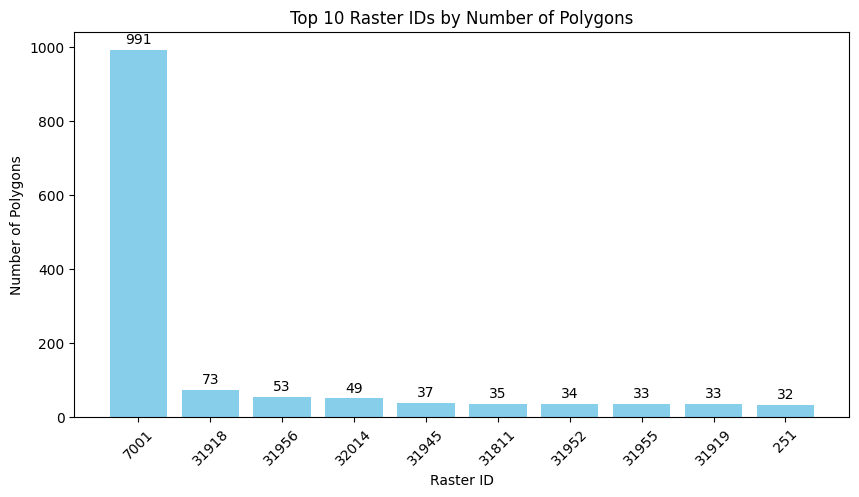

In [ ]:
# Plot top 10 IDs
top_10 = id_counts.most_common(10)
ids, counts = zip(*top_10)
ids = [str(i) for i in ids]  # convert IDs to strings for plotting

plt.figure(figsize=(10,5))
plt.bar(ids, counts, color='skyblue')
plt.xlabel("Raster ID")
plt.ylabel("Number of Polygons")
plt.title("Top 10 Raster IDs by Number of Polygons")
plt.xticks(rotation=45)

# Add counts on top of bars
for i, count in enumerate(counts):
    plt.text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom')

plt.show()





      id                                           geometry
0  31805  POLYGON ((8.94167 37.54167, 8.95 37.54167, 8.9...
1  31805  POLYGON ((8.95 37.53333, 8.95833 37.53333, 8.9...
2  31802  POLYGON ((8.93333 37.54167, 8.94167 37.54167, ...
3  31828  POLYGON ((9.85833 37.34167, 9.86667 37.34167, ...
4   7001  POLYGON ((9.85833 37.33333, 9.86667 37.33333, ...


<Figure size 1200x1200 with 0 Axes>

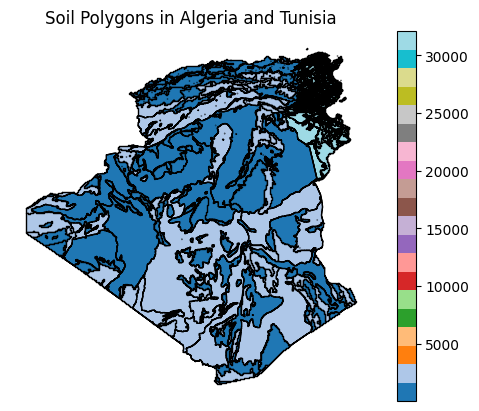

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = "/content/drive/MyDrive/data_set/soil_type/shapefiles/id only/HWSD_Algeria_Tunisia.shp"

# Load shapefile with GeoPandas
gdf = gpd.read_file(shapefile_path)

# Quick look at the data
print(gdf.head())

# Plot the polygons colored by their ID
plt.figure(figsize=(12, 12))
gdf.plot(column='id', cmap='tab20', legend=True, edgecolor='black')
plt.title("Soil Polygons in Algeria and Tunisia")
plt.axis('off')
plt.show()


In [ ]:
missing_counts = gdf.isna().sum()
print("📊 Valeurs manquantes par colonne :")
print(missing_counts)

rows_with_missing = gdf[gdf.isna().any(axis=1)]
print(f"🔎 Nombre de lignes avec des valeurs manquantes : {len(rows_with_missing)}")
display(rows_with_missing.head())


📊 Valeurs manquantes par colonne :
id          0
geometry    0
dtype: int64
🔎 Nombre de lignes avec des valeurs manquantes : 0


Empty GeoDataFrame
Columns: [id, geometry]
Index: []

## joining shapefile to db

In [ ]:
from collections import Counter
# Now rename the column in the GeoDataFrame
gdf = gdf.rename(columns={'id': 'HWSD2_SMU_ID'})


df_filtered = gdf.merge(df_d1, on='HWSD2_SMU_ID', how='left')


print("Number of rows:", len(df_filtered))

id_counts = Counter(df_filtered['HWSD2_SMU_ID'])
# Total unique IDs
print("\nNumber of unique polygons:", len(id_counts))


print(df_filtered[df_filtered['HWSD2_SMU_ID'] == 92])


Number of rows: 5254

Number of unique polygons: 389
      HWSD2_SMU_ID                                           geometry  COARSE  \
5088            92  POLYGON ((-6.30833 26.94167, -6.275 26.94167, ...      18   
5089            92  POLYGON ((-6.30833 26.94167, -6.275 26.94167, ...      12   

      SAND  SILT  CLAY  TEXTURE_USDA TEXTURE_SOTER  BULK  REF_BULK  ...  \
5088    66    22    12          11.0             C  1.37      1.56  ...   
5089    57    27    16          11.0             M  1.43      1.65  ...   

      CEC_SOIL  CEC_CLAY  CEC_EFF  TEB  BSAT  ALUM_SAT  ESP  TCARBON_EQ  \
5088         6        35       25   10    64         0    3         6.3   
5089        13        74       30   30   100         0    3         8.0   

      GYPSUM  ELEC_COND  
5088     0.3          1  
5089     4.0          1  

[2 rows x 24 columns]


##saving all attributes to shapefile

=== Columns in saved shapefile ===
Index(['ID', 'COARSE', 'SAND', 'SILT', 'CLAY', 'USDA', 'SOTER', 'BULK',
       'REF_BULK', 'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL',
       'CEC_CLAY', 'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ',
       'GYPSUM', 'ELEC_COND', 'geometry'],
      dtype='object')

=== First few rows ===
      ID  COARSE  SAND  SILT  CLAY  USDA SOTER  BULK  REF_BULK  ORG_CARBON  \
0  31805       9    87     9     4  12.0     C  1.44      1.20       0.628   
1  31805       5    33    31    36   5.0     F  1.35      1.90       1.930   
2  31805       9    87     9     4  12.0     C  1.44      1.20       0.628   
3  31805       5    33    31    36   5.0     F  1.35      1.90       1.930   
4  31802      11    40    41    19   9.0     M  1.47      1.69       2.037   

   ...  CEC_CLAY  CEC_EFF  TEB  BSAT  ALUM_SAT  ESP  TCARBON_EQ  GYPSUM  \
0  ...        33        3    3    76         6    2         0.0     0.1   
1  ...        34       15  

<Figure size 1200x1200 with 0 Axes>

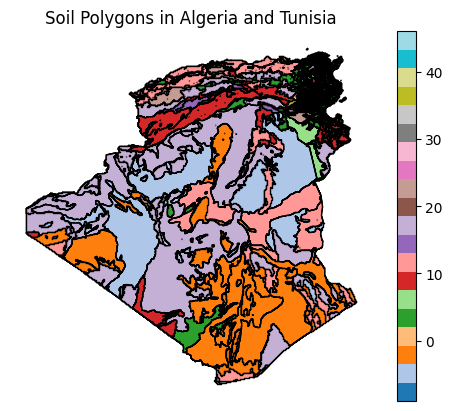

In [ ]:

import os
#  Column names longer than 10 characters will be truncated when saved to ESRI Shapefile
df_copy = df_filtered.copy()
df_copy = df_copy.rename(columns={
    'HWSD2_SMU_ID': 'ID',
    'TEXTURE_USDA': 'USDA',
    'TEXTURE_SOTER': 'SOTER'
})
df_copy = df_copy.drop(columns=['WRB4', 'SHARE'], errors='ignore')

# saving joined shapefile
output_path = "/content/drive/MyDrive/data_set/soil_type/shapefiles/joined attributes/HWSD_Algeria_Tunisia_joined.shp"
df_copy.to_file(output_path)

# check columns
gdf_check = gpd.read_file(output_path)

print("=== Columns in saved shapefile ===")
print(gdf_check.columns)

print("\n=== First few rows ===")
print(gdf_check.head())

#  PLOT CLAY (ONLY CONSIDERS LAST ROW (OVERWRITES))
plt.figure(figsize=(12, 12))
gdf_check.plot(column='COARSE', cmap='tab20', legend=True, edgecolor='black')
plt.title("Soil Polygons in Algeria and Tunisia")
plt.axis('off')
plt.show()




#save dataframe
csv_path = os.path.join("/content/drive/MyDrive/data_set/soil_type/", "soil_dataset.csv")

# Save the DataFrame
df_copy.to_csv(csv_path, index=False)

## EDA

### table description

In [ ]:
df_filtered.describe()


HWSD2_SMU_ID       COARSE         SAND         SILT         CLAY  \
count   5254.000000  5254.000000  5254.000000  5254.000000  5254.000000   
mean   21142.096688     6.964218    36.310430    21.823563    15.323373   
std    13665.100442    11.448220    26.405479    17.193358    14.893336   
min       36.000000    -9.000000    -9.000000    -9.000000    -9.000000   
25%     7001.000000     2.000000    18.000000    18.000000    12.000000   
50%    31838.000000     5.000000    43.000000    28.000000    18.000000   
75%    31945.000000    14.000000    55.000000    33.000000    23.000000   
max    32050.000000    46.000000    90.000000    53.000000    55.000000   

       TEXTURE_USDA         BULK     REF_BULK   ORG_CARBON     PH_WATER  ...  \
count    4141.00000  5254.000000  4141.000000  5254.000000  5254.000000  ...   
mean        9.02753    -0.656355     1.716011    -1.094972     4.308527  ...   
std         2.42326     4.103798     0.129544     3.915519     6.676509  ...   
min         3.00000    -9.000000     1.200000    -9.000000    -9.000000  ...   
25%         9.00000     1.220000     1.650000     0.429000     6.300000  ...   
50%         9.00000     1.420000     1.710000     0.648000     7.700000  ...   
75%        11.00000     1.460000     1.780000     0.780000     8.100000  ...   
max        12.00000     1.760000     2.040000     7.326000     8.600000  ...   

          CEC_SOIL     CEC_CLAY      CEC_EFF          TEB         BSAT  \
count  5254.000000  5254.000000  5254.000000  5254.000000  5254.000000   
mean     10.506281    45.383327    27.430910    26.845070    72.519414   
std      11.584790    30.670445    27.389334    27.403834    42.958667   
min      -9.000000    -9.000000    -9.000000    -9.000000    -9.000000   
25%       6.000000    35.000000    13.000000    10.000000    74.000000   
50%      14.000000    54.000000    30.000000    30.000000    97.000000   
75%      16.000000    71.000000    37.000000    37.750000   100.000000   
max      41.000000    83.000000   143.000000   143.000000   100.000000   

          ALUM_SAT          ESP   TCARBON_EQ       GYPSUM    ELEC_COND  
count  5254.000000  5254.000000  5254.000000  5254.000000  5254.000000  
mean     -1.466502     5.323563     5.693453     1.759497     0.274648  
std       4.590640    16.397336     9.563220    11.234898     6.479958  
min      -9.000000    -9.000000    -9.000000    -9.000000    -9.000000  
25%       0.000000     1.000000     0.000000     0.100000     0.000000  
50%       0.000000     3.000000     8.000000     0.300000     1.000000  
75%       0.000000     4.000000    11.300000     2.200000     1.000000  
max      40.000000    67.000000    31.299999    57.599998    32.000000  

[8 rows x 22 columns]

In [ ]:
total_count = df_filtered['TEXTURE_SOTER'].count()
print(total_count)

5254


### missing values

In [ ]:
## I checked them in OUTLIERSSSS

In [ ]:
missing_counts = df_filtered.isna().sum()
print("Missing values per column:\n", missing_counts)


Missing values per column:
 HWSD2_SMU_ID        0
geometry            0
COARSE              0
SAND                0
SILT                0
CLAY                0
TEXTURE_USDA     1113
TEXTURE_SOTER       0
BULK                0
REF_BULK         1113
ORG_CARBON          0
PH_WATER            0
TOTAL_N             0
CN_RATIO            0
CEC_SOIL            0
CEC_CLAY            0
CEC_EFF             0
TEB                 0
BSAT                0
ALUM_SAT            0
ESP                 0
TCARBON_EQ          0
GYPSUM              0
ELEC_COND           0
dtype: int64


In [ ]:
rows_with_missing = df_filtered[df_filtered.isna().any(axis=1)]
print("Rows with missing values:", rows_with_missing.shape[0])


Rows with missing values: 1113





### soil types per polygon


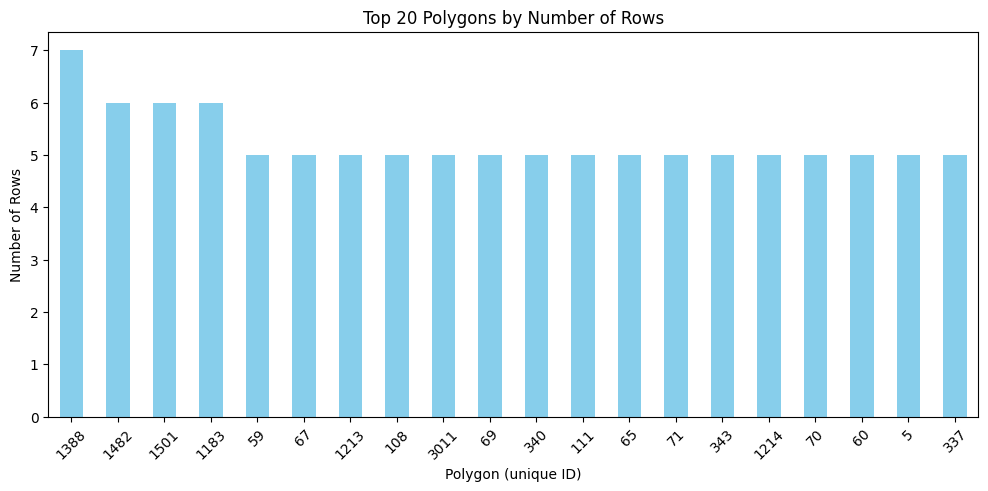

In [ ]:
import matplotlib.pyplot as plt

# Create a temporary Series of polygon IDs using ngroup, without modifying df_filtered
poly_ids = df_filtered.groupby('geometry').ngroup()

# Count how many times each unique polygon appears
polygon_counts = poly_ids.value_counts()

# Plot top 20 polygons
polygon_counts.head(20).plot(
    kind='bar', figsize=(12,5), color='skyblue'
)
plt.xlabel("Polygon (unique ID)")
plt.ylabel("Number of Rows")
plt.title("Top 20 Polygons by Number of Rows")
plt.xticks(rotation=45)
plt.show()


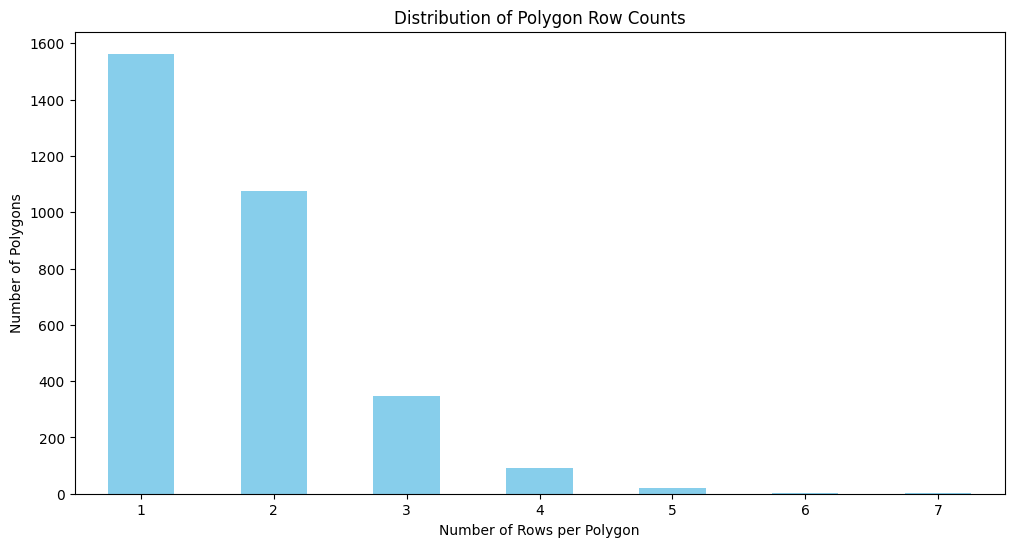

In [ ]:
# Temporary Series of polygon IDs using ngroup
poly_ids = df_filtered.groupby('geometry').ngroup()

# Count how many times each unique polygon appears
polygon_counts = poly_ids.value_counts()  # number of rows per polygon

# Now count how many polygons have each number of rows
count_of_counts = polygon_counts.value_counts().sort_index()

# Plot
count_of_counts.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.xlabel("Number of Rows per Polygon")
plt.ylabel("Number of Polygons")
plt.title("Distribution of Polygon Row Counts")
plt.xticks(rotation=0)
plt.show()

### Categorical attributes (texture)

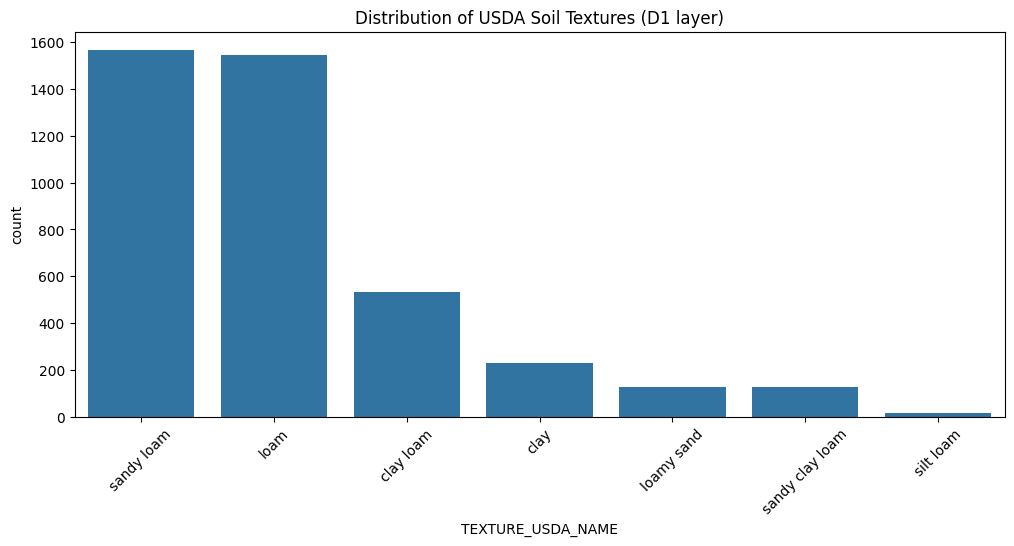

In [ ]:
# USDA (United States Department of Agriculture) convention
usda_map = {
    1: 'clay (heavy)',
    2: 'silty clay',
    3: 'clay',
    4: 'silty clay loam',
    5: 'clay loam',
    6: 'silt',
    7: 'silt loam',
    8: 'sandy clay',
    9: 'loam',
    10: 'sandy clay loam',
    11: 'sandy loam',
    12: 'loamy sand',
    13: 'sand'
}


df_texture = df_filtered.copy()

# Map USDA codes to names in the new DataFrame
df_texture['TEXTURE_USDA_NAME'] = df_texture['TEXTURE_USDA'].map(usda_map)

# Count values
texture_counts = df_texture['TEXTURE_USDA_NAME'].value_counts()

# Plot
plt.figure(figsize=(12,5))
sns.countplot(data=df_texture, x='TEXTURE_USDA_NAME',
              order=texture_counts.index)
plt.xticks(rotation=45)
plt.title("Distribution of USDA Soil Textures (D1 layer)")
plt.ylabel("count")
plt.show()


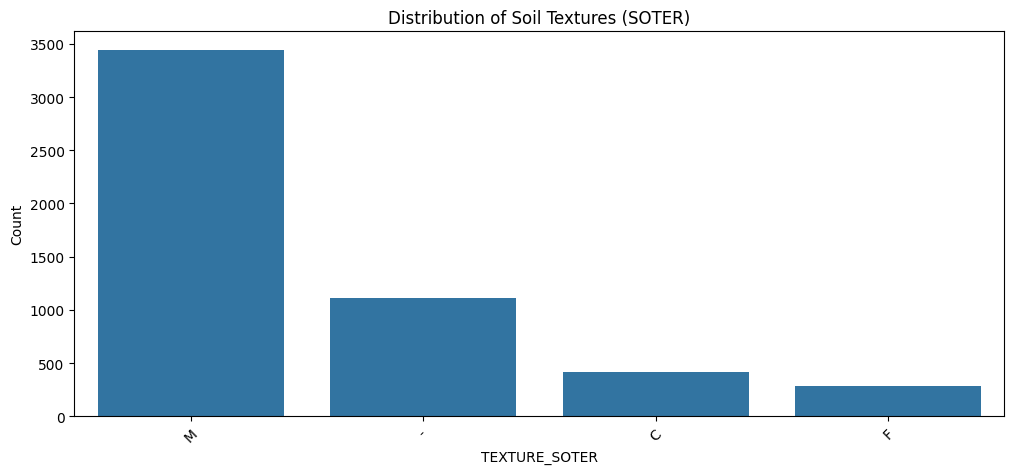

In [ ]:
# C=COARSE
# M=Medium
# F=Fine

# Count the values
soter_counts = df_filtered['TEXTURE_SOTER'].value_counts()

# Plot
plt.figure(figsize=(12,5))
sns.countplot(data=df_filtered, x='TEXTURE_SOTER',
              order=soter_counts.index)
plt.xticks(rotation=45)
plt.title("Distribution of Soil Textures (SOTER)")
plt.ylabel("Count")
plt.show()


In [ ]:
valid_count = df_filtered[df_filtered['TEXTURE_SOTER'] != '-'].shape[0]
print(valid_count)

#Empty texture values for both attributes

4141


In [ ]:
df_check = df_filtered.copy()

# Treat '-' as missing in TEXTURE_SOTER
df_check['TEXTURE_SOTER'] = df_check['TEXTURE_SOTER'].replace('-', pd.NA)

# Count missing values per column
missing_counts = df_check.isna().sum()
print("Missing values per column:\n", missing_counts)

# Extract rows that have any missing values
rows_with_missing = df_check[df_check.isna().any(axis=1)]
print("Rows with missing values:", rows_with_missing.shape[0])

Missing values per column:
 HWSD2_SMU_ID        0
geometry            0
COARSE              0
SAND                0
SILT                0
CLAY                0
TEXTURE_USDA     1113
TEXTURE_SOTER    1113
BULK                0
REF_BULK         1113
ORG_CARBON          0
PH_WATER            0
TOTAL_N             0
CN_RATIO            0
CEC_SOIL            0
CEC_CLAY            0
CEC_EFF             0
TEB                 0
BSAT                0
ALUM_SAT            0
ESP                 0
TCARBON_EQ          0
GYPSUM              0
ELEC_COND           0
dtype: int64
Rows with missing values: 1113


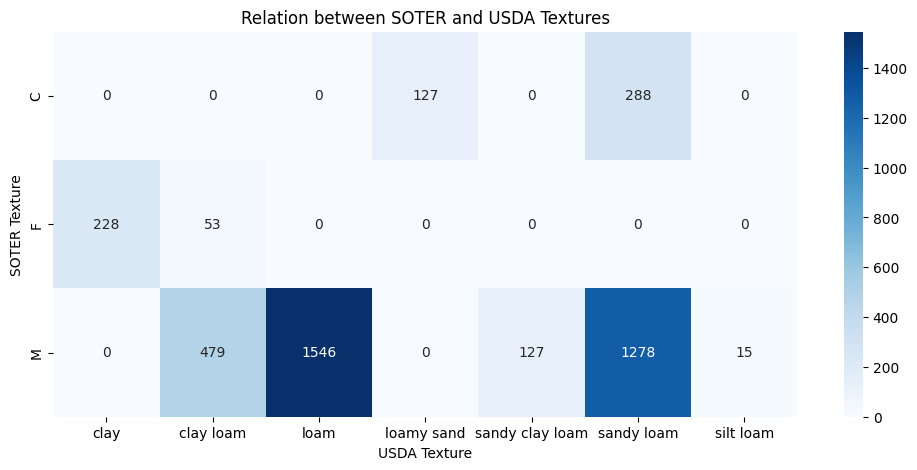

In [ ]:
cross = pd.crosstab(df_filtered['TEXTURE_SOTER'], df_texture['TEXTURE_USDA_NAME'])

# Heatmap
plt.figure(figsize=(12,5))
sns.heatmap(cross, annot=True, fmt='d', cmap='Blues')
plt.title("Relation between SOTER and USDA Textures")
plt.ylabel("SOTER Texture")
plt.xlabel("USDA Texture")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, chi2

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(cross)

# Compute critical value (95% confidence)
critical_value = chi2.ppf(0.95, dof)

# Print results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("Critical value (95% confidence):", critical_value)
print("p-value:", p_value)


#small p-value --> higher chance of being associated
#the probability that you could see a difference this big (or bigger) just by random chance — if the two things were actually unrelated.
# ex p<0.05 proba <5% that the pattern ahppened by luck


# X^2 >>> critical value --> significant relationship

Chi-square statistic: 4893.640420191652
Degrees of freedom: 12
Critical value (95% confidence): 21.02606981748307
p-value: 0.0


### Texture vs (clay-sand-slit)

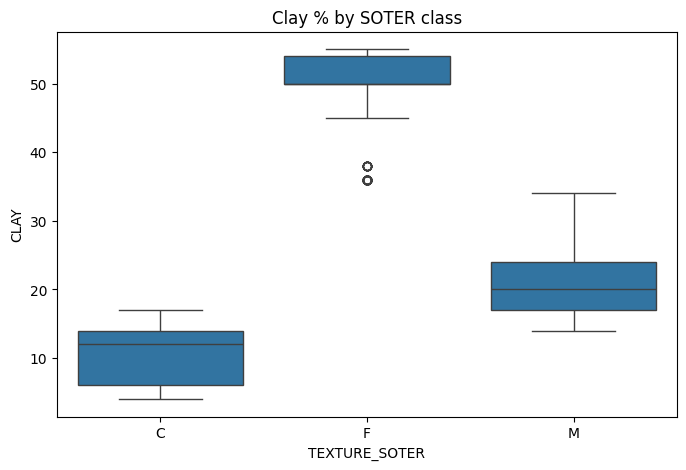

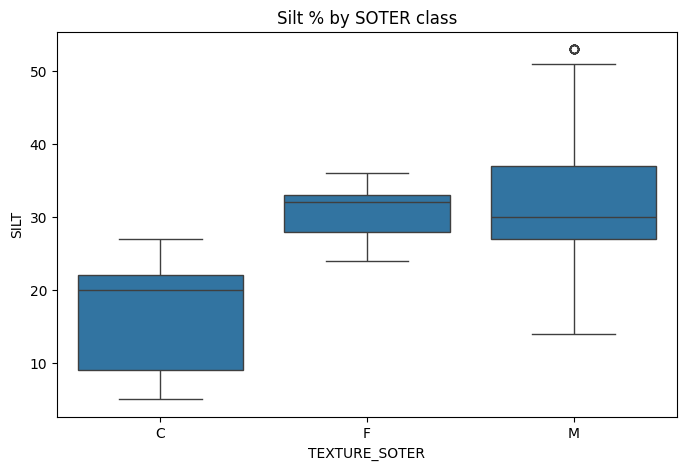

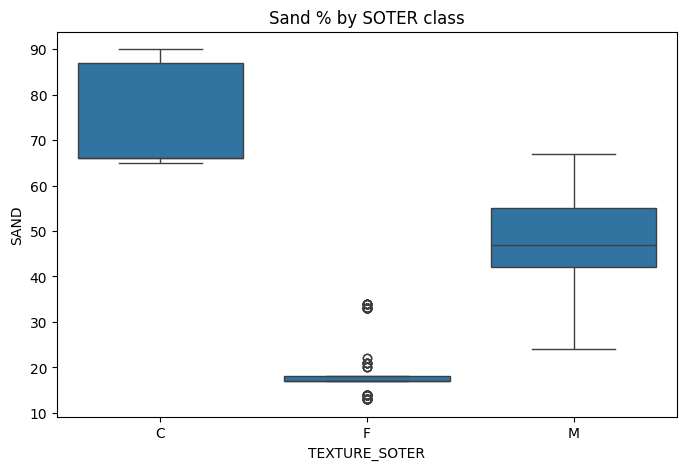

In [ ]:
# Keep only rows where TEXTURE_SOTER is valid
df_soter_valid = df_filtered[df_filtered['TEXTURE_SOTER'] != '-']

# Clay percentage by SOTER class
plt.figure(figsize=(8,5))
sns.boxplot(x='TEXTURE_SOTER', y='CLAY', data=df_soter_valid)
plt.title("Clay % by SOTER class")
plt.show()

# Silt percentage by SOTER class
plt.figure(figsize=(8,5))
sns.boxplot(x='TEXTURE_SOTER', y='SILT', data=df_soter_valid)
plt.title("Silt % by SOTER class")
plt.show()

# Sand percentage by SOTER class
plt.figure(figsize=(8,5))
sns.boxplot(x='TEXTURE_SOTER', y='SAND', data=df_soter_valid)
plt.title("Sand % by SOTER class")
plt.show()


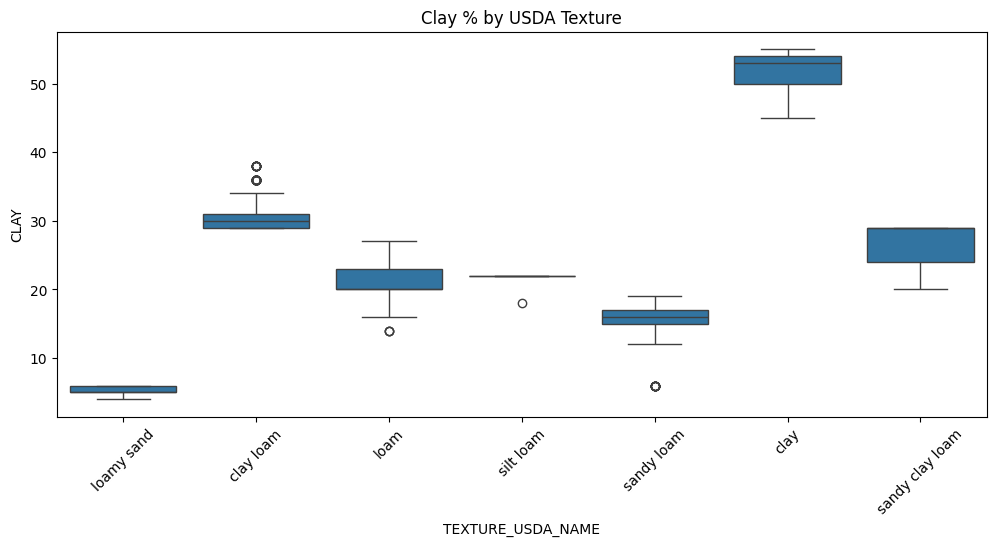

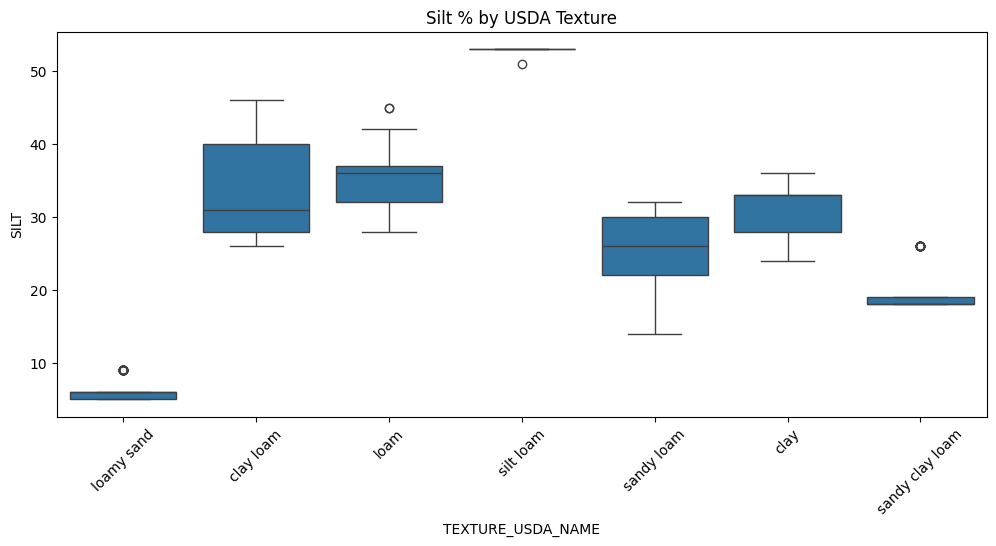

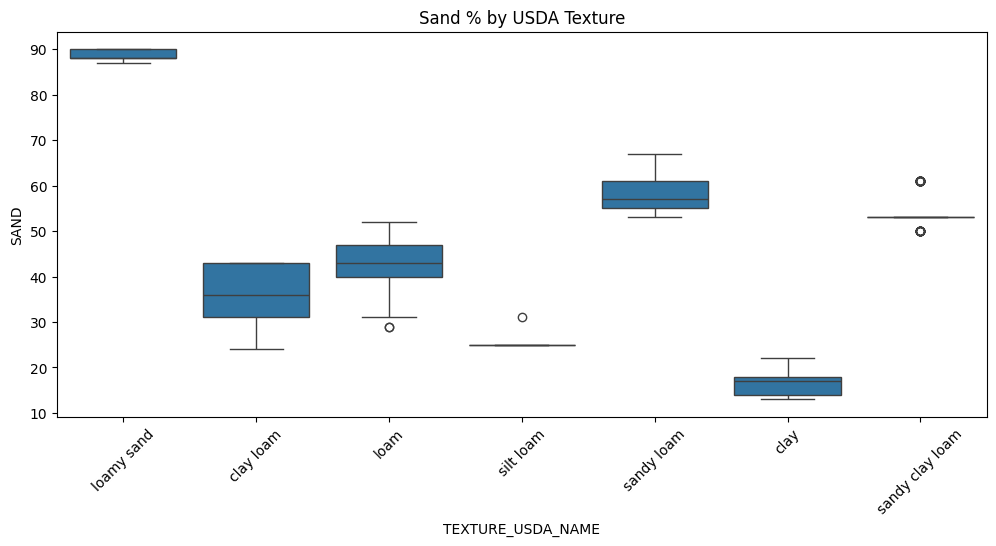

In [ ]:

# Clay percentage by USDA texture
plt.figure(figsize=(12, 5))
sns.boxplot(x='TEXTURE_USDA_NAME', y='CLAY', data=df_texture)
plt.title("Clay % by USDA Texture")
plt.xticks(rotation=45)
plt.show()

# Plot Silt %
plt.figure(figsize=(12, 5))
sns.boxplot(x='TEXTURE_USDA_NAME', y='SILT', data=df_texture)
plt.title("Silt % by USDA Texture")
plt.xticks(rotation=45)
plt.show()

# Plot Sand %
plt.figure(figsize=(12, 5))
sns.boxplot(x='TEXTURE_USDA_NAME', y='SAND', data=df_texture)
plt.title("Sand % by USDA Texture")
plt.xticks(rotation=45)
plt.show()


### Numeric atributes



#### Heatmap

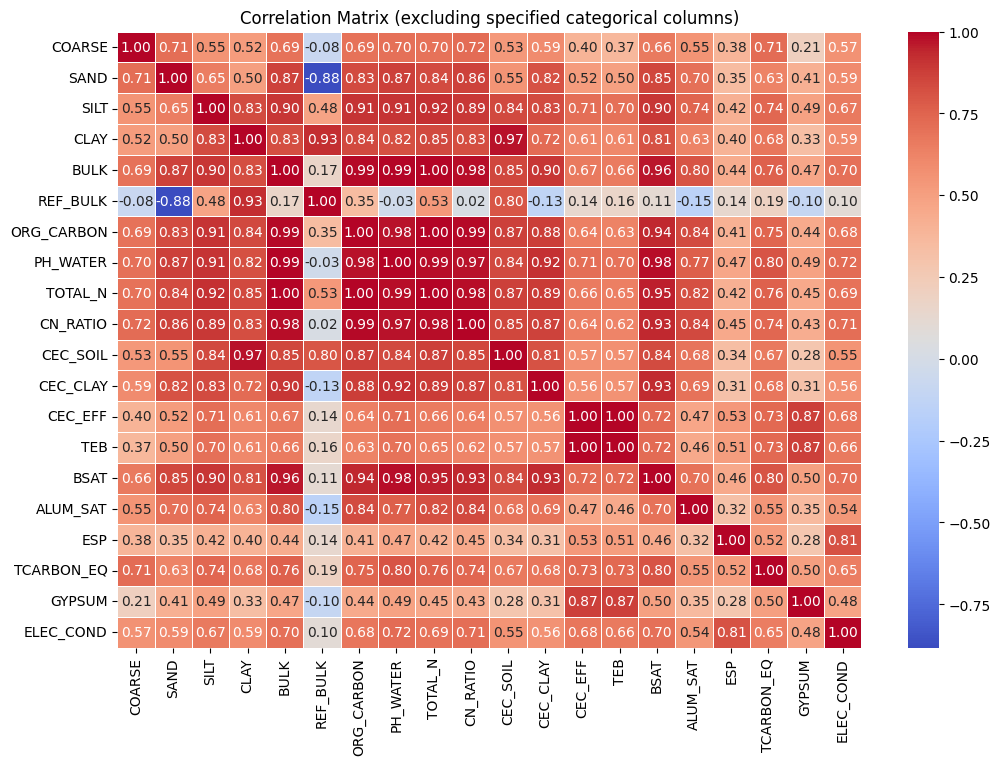

In [ ]:

cols_to_exclude = ['TEXTURE_SOTER', 'TEXTURE_USDA', 'HWSD2_SMU_ID']
numeric_df = df_filtered.drop(columns=cols_to_exclude).select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (excluding specified categorical columns)")
plt.show()





#ref_bulk and sand :
# REF_BULK = “ideal” packing” → sand is loosely packed → lower density → negative correlation.

# BULK = “real soil” → sand can compact more → actual measured density may increase → positive correlation.

In [ ]:
#coarse like classification -->correlated to sand
# Cations (pronounced CAT - ions ) positively charged ions   gypsum too
# ions - carbon


#### Histogrammes + boxplots

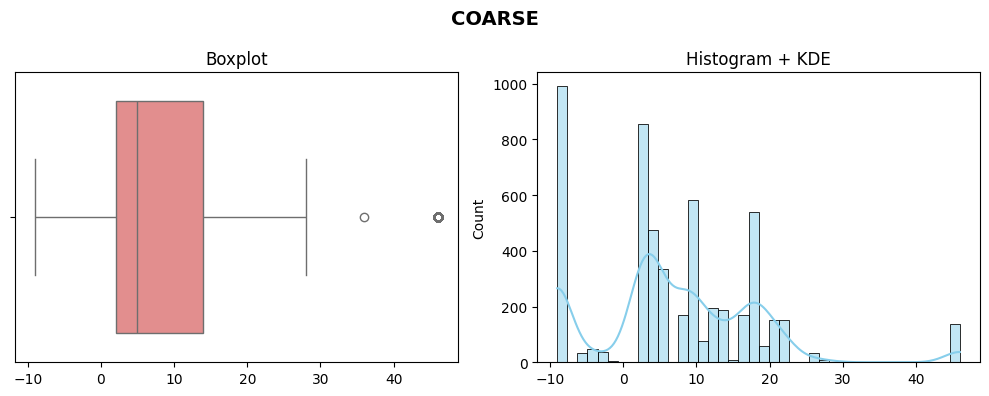

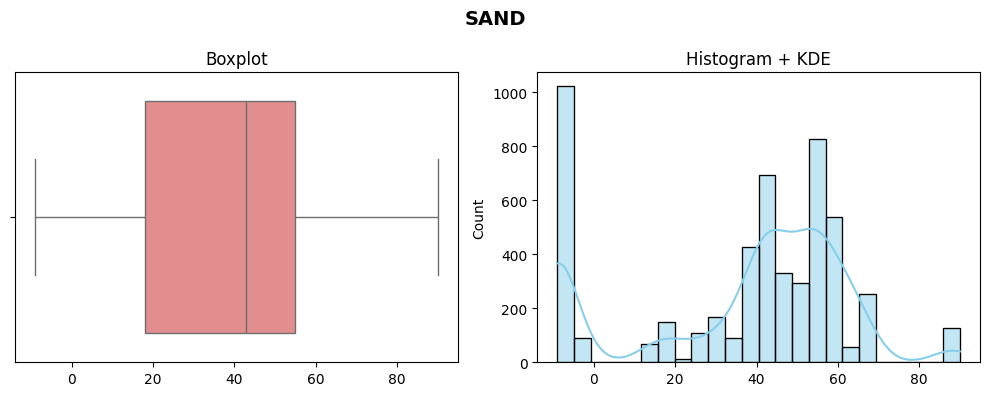

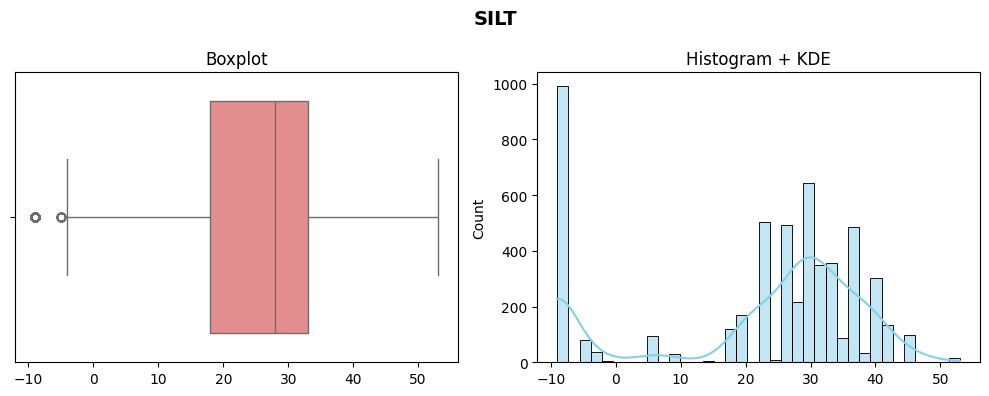

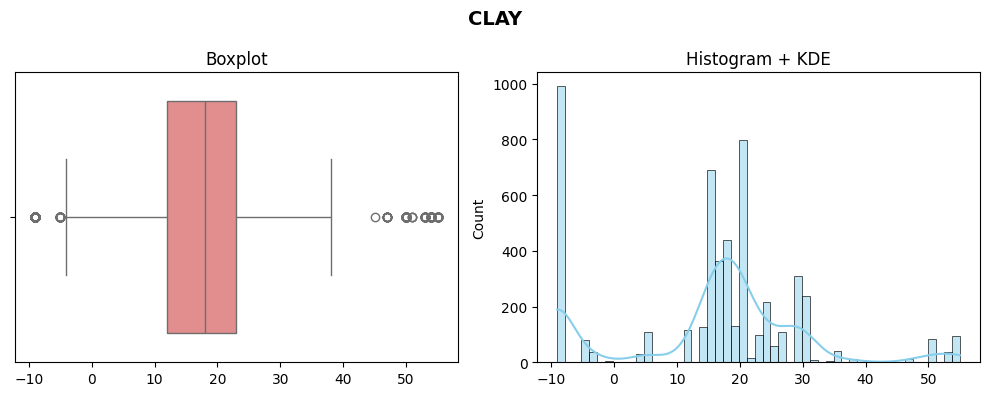

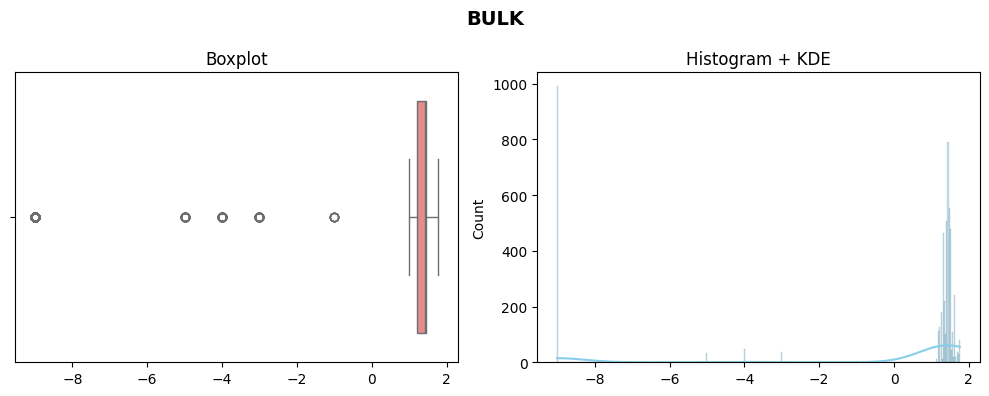

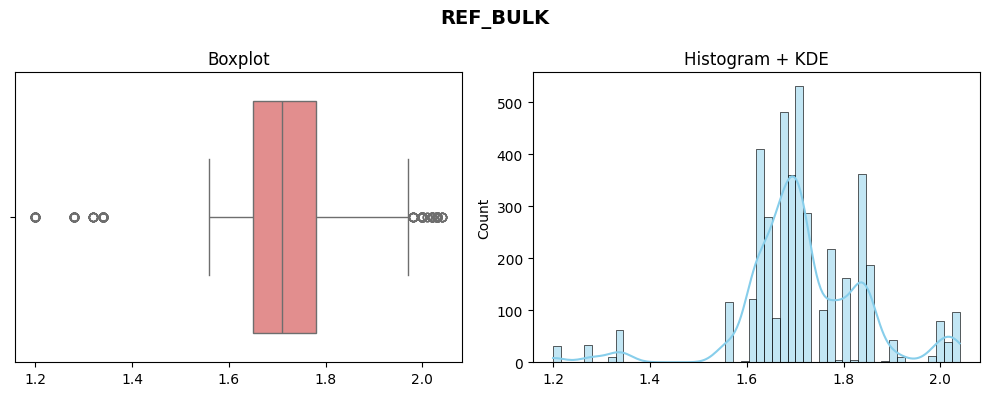

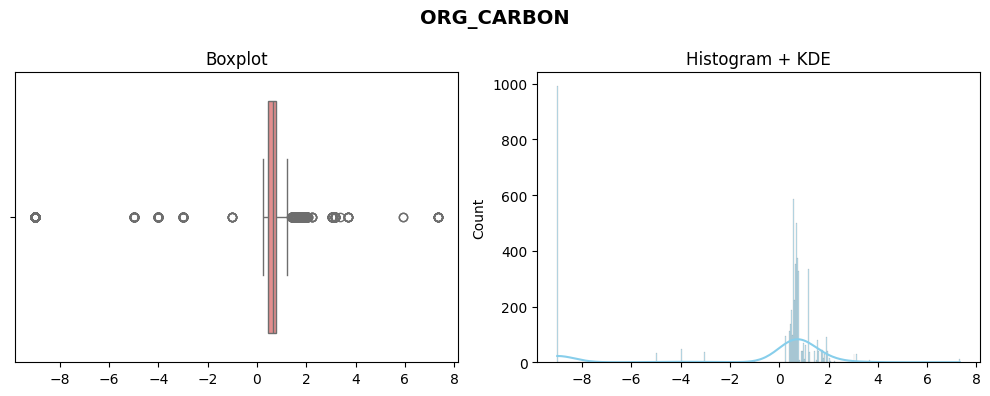

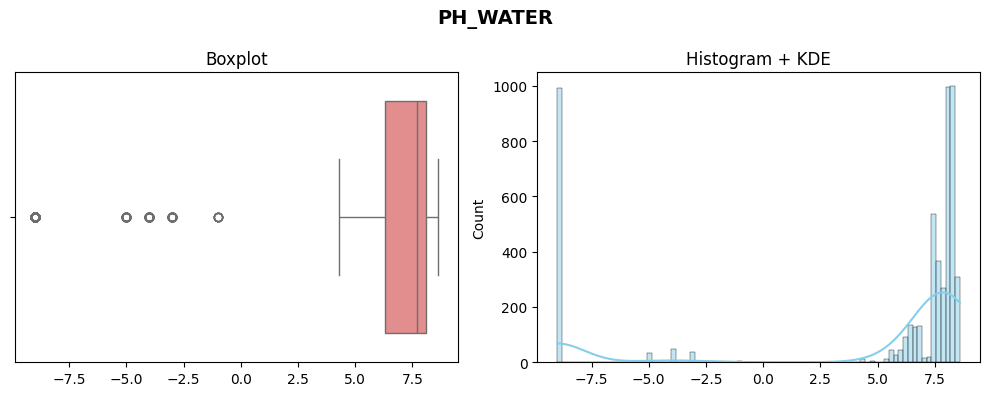

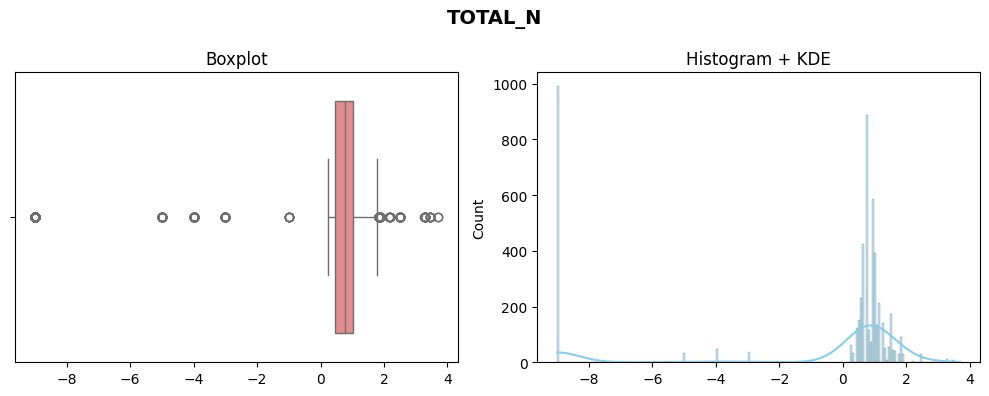

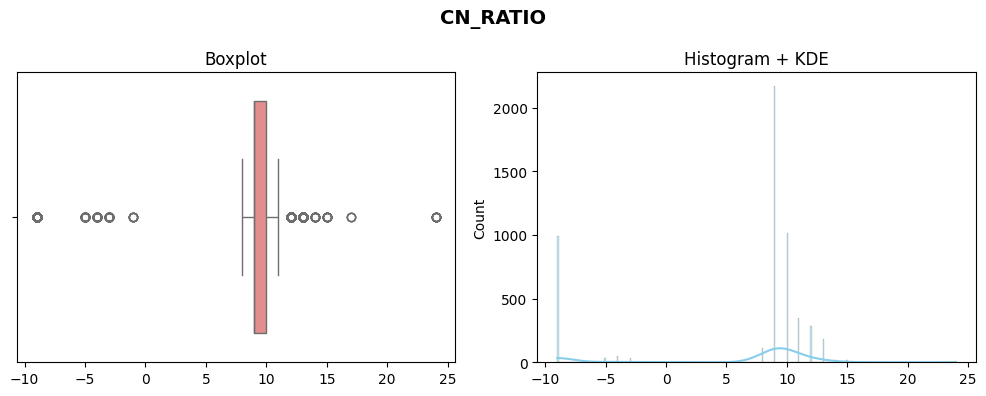

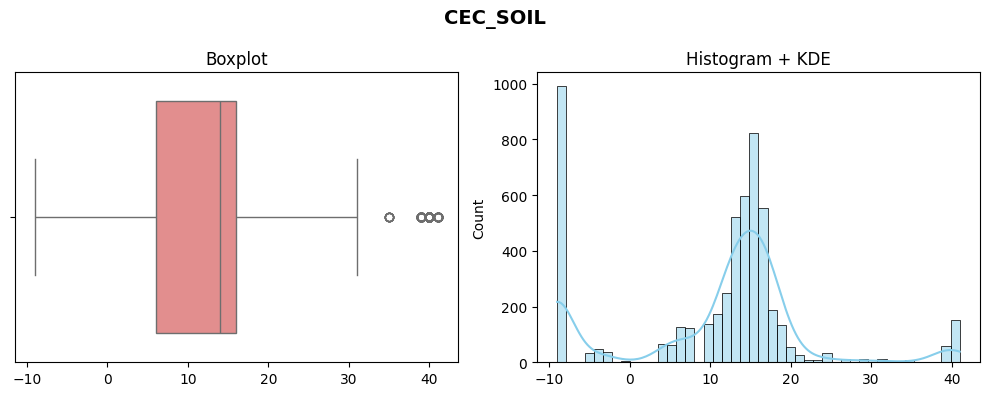

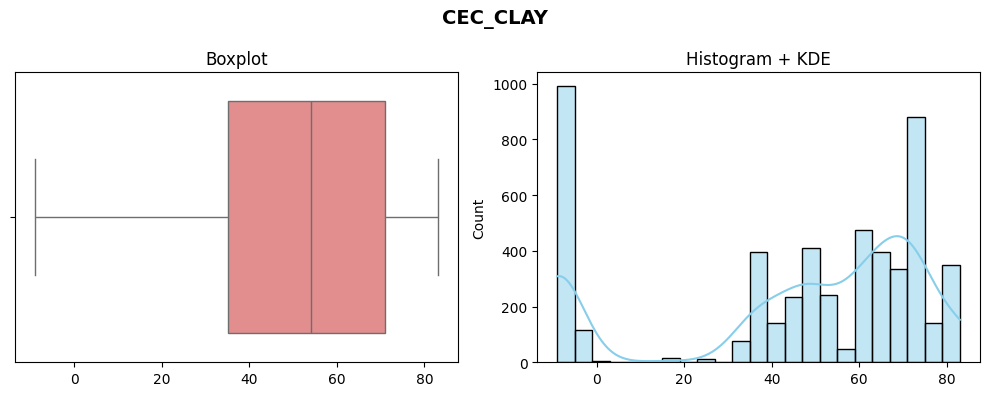

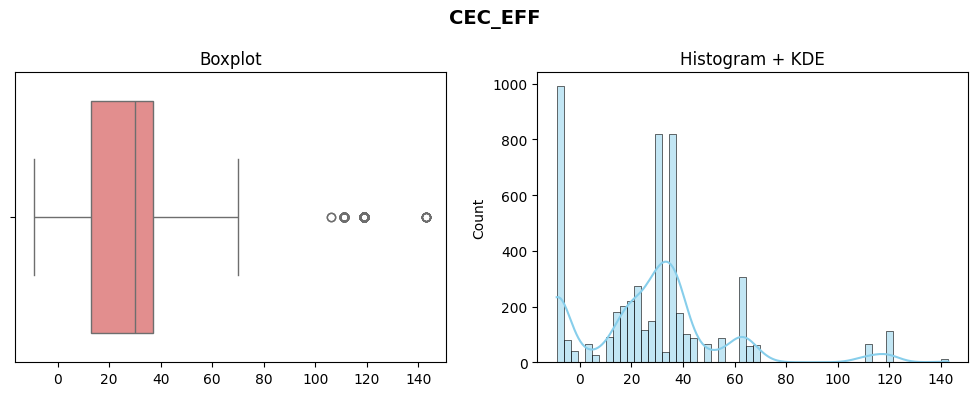

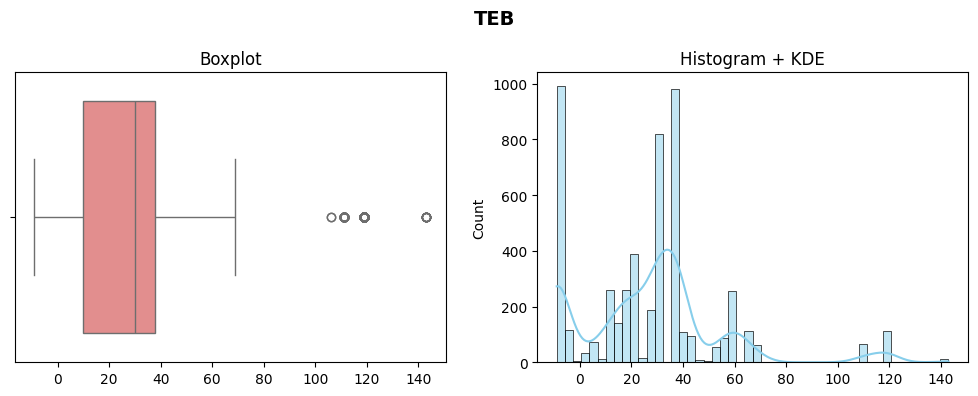

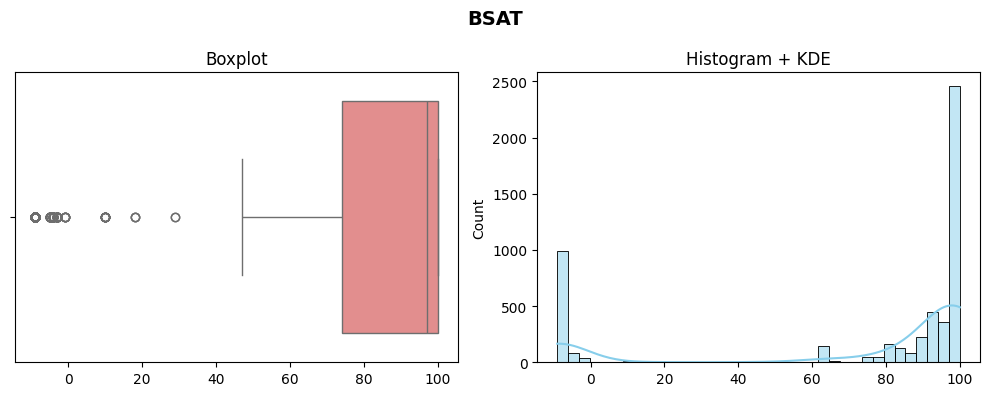

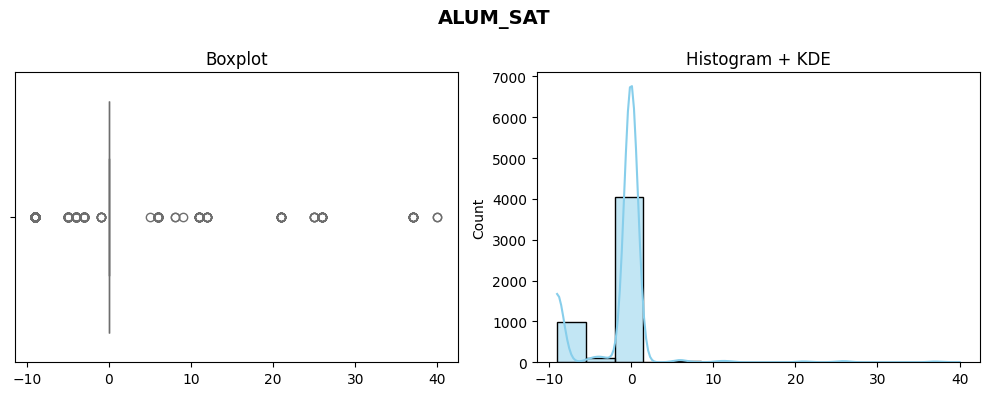

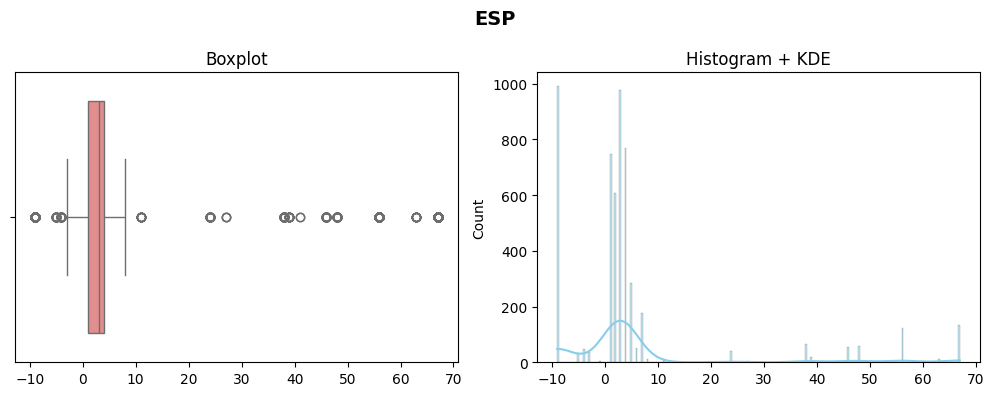

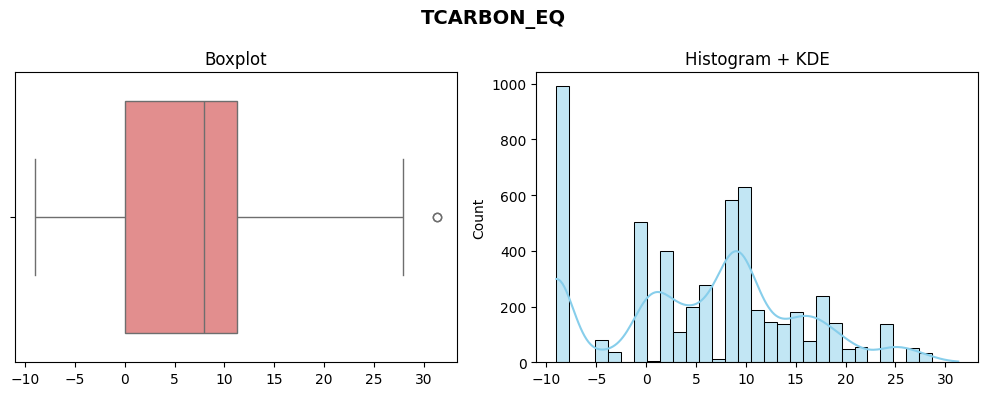

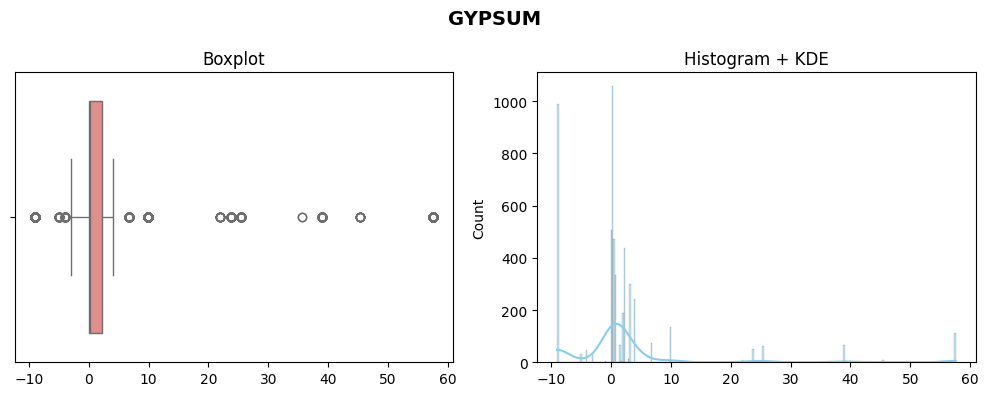

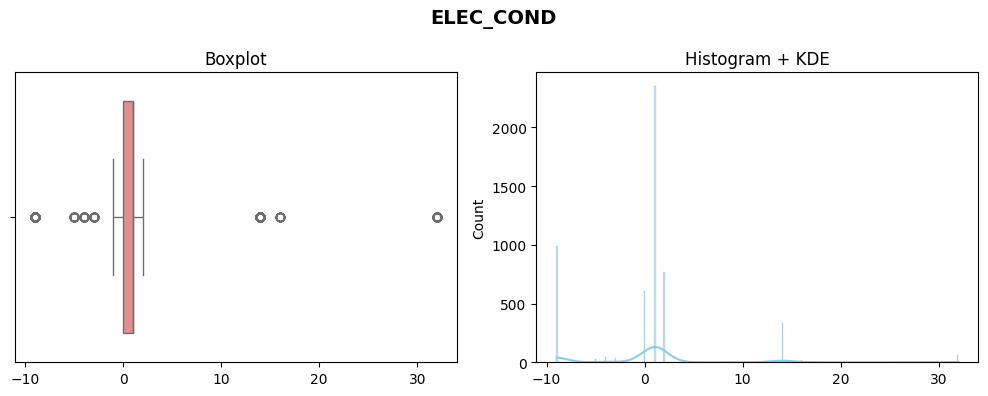

In [ ]:
# Columns to exclude
cols_to_exclude = ['TEXTURE_SOTER', 'TEXTURE_USDA', 'HWSD2_SMU_ID']

# Select numeric columns
numeric_cols = df_filtered.drop(columns=cols_to_exclude).select_dtypes(include='number')

# Loop through numeric columns
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(col, fontsize=14, fontweight='bold')

    # Boxplot
    sns.boxplot(x=df_filtered[col], ax=axes[0], color='lightcoral')
    axes[0].set_title("Boxplot")
    axes[0].set_xlabel("")

    # Histogram + KDE
    sns.histplot(df_filtered[col], kde=True, ax=axes[1], color='skyblue')
    axes[1].set_title("Histogram + KDE")
    axes[1].set_xlabel("")

    plt.tight_layout()
    plt.show()

In [ ]:
# OUTLIERS :
# negative values can be interpreted as 0
# mayber tehy were missing values ???

### Missing values

In [ ]:
import pandas as pd
import numpy as np

# Columns to exclude from numeric checks
cols_to_exclude = ['geometry', 'HWSD2_SMU_ID', 'TEXTURE_USDA', 'TEXTURE_SOTER']

# All columns except excluded ones
cols_to_check = [c for c in df_filtered.columns if c not in cols_to_exclude]

# 1️⃣ Identify invalid values
issues = {}

for col in df_filtered.columns:
    if col in ['TEXTURE_USDA', 'TEXTURE_SOTER']:
        # Count hyphens and NaNs
        mask_invalid = df_filtered[col].isin(['-', None, '']) | df_filtered[col].isna()
    elif col not in cols_to_exclude:
        # Numeric columns: negative or NaN
        mask_invalid = (df_filtered[col] < 0) | df_filtered[col].isna()
    else:
        # Skip excluded columns
        continue

    issues[col] = {
        'n_invalid': mask_invalid.sum(),
        'rows_invalid': set(df_filtered.index[mask_invalid])
    }

# 2️⃣ Print per-column summary
print("=== Invalid values summary ===")
for col, info in issues.items():
    print(f"{col:<20} -> {info['n_invalid']} invalid rows")

# 3️⃣ Check if the same rows are invalid across multiple columns
# Combine all invalid row indices
all_invalid_rows = set.union(*(v['rows_invalid'] for v in issues.values() if v['rows_invalid']))

# Create a matrix showing which columns are invalid per row
invalid_matrix = pd.DataFrame({
    col: df_filtered.index.isin(list(info['rows_invalid']))
    for col, info in issues.items()
}, index=df_filtered.index)

# Filter only rows that have at least one invalid entry
invalid_matrix = invalid_matrix.loc[invalid_matrix.any(axis=1)]

print("\n=== Rows with at least one invalid value ===")
print(invalid_matrix.sum(axis=1).value_counts().sort_index())
print("(The number above each value = how many columns were invalid in that row)")

# Optional: view rows that have multiple invalids
rows_with_multiple_issues = invalid_matrix[invalid_matrix.sum(axis=1) > 1]
print(f"\nRows with multiple invalid values: {len(rows_with_multiple_issues)}")
print(rows_with_multiple_issues.head())


=== Invalid values summary ===
COARSE               -> 1113 invalid rows
SAND                 -> 1113 invalid rows
SILT                 -> 1113 invalid rows
CLAY                 -> 1113 invalid rows
TEXTURE_USDA         -> 1113 invalid rows
TEXTURE_SOTER        -> 1113 invalid rows
BULK                 -> 1113 invalid rows
REF_BULK             -> 1113 invalid rows
ORG_CARBON           -> 1113 invalid rows
PH_WATER             -> 1113 invalid rows
TOTAL_N              -> 1113 invalid rows
CN_RATIO             -> 1113 invalid rows
CEC_SOIL             -> 1113 invalid rows
CEC_CLAY             -> 1113 invalid rows
CEC_EFF              -> 1113 invalid rows
TEB                  -> 1113 invalid rows
BSAT                 -> 1113 invalid rows
ALUM_SAT             -> 1113 invalid rows
ESP                  -> 1113 invalid rows
TCARBON_EQ           -> 1113 invalid rows
GYPSUM               -> 1113 invalid rows
ELEC_COND            -> 1113 invalid rows

=== Rows with at least one invalid value ===

**Soil Texture & Particles**

COARSE – Volume percentage of large soil particles >2 mm (stones, gravel). Shows how rocky the soil is.

SAND – Weight percentage of sand particles (0.05–2 mm). Sand feels gritty; influences drainage.

SILT – Weight percentage of silt particles (0.002–0.05 mm). Feels like flour; retains water moderately.

CLAY – Weight percentage of clay particles (<0.002 mm). Plastic when wet; retains nutrients and water.

TEXTURE_USDA – Soil texture class (USDA), derived from relative proportions of sand, silt, clay (e.g., loam, sandy loam, clay).

TEXTURE_SOTER – Soil texture class according to SOTER/FAO classification (another global standard).

**Soil Density**

BULK – Bulk density (g/cm³). Mass of soil per unit volume, including pores; affects root growth.

REF_BULK – Reference bulk density; includes particle pores, gives baseline for soil compaction.

**Soil Organic Matter & pH**

ORG_CARBON – Organic carbon content (g/kg); indicator of fertility and soil health.

PH_WATER – Soil pH in water; measures acidity/alkalinity (low pH = acidic, high pH = alkaline).

**Nutrients & Ratios**

TOTAL_N – Total nitrogen content (g/kg); key for fertility.

CN_RATIO – Carbon-to-nitrogen ratio; indicates balance between energy (C) and nutrient (N) availability for microbes.

**Cation Exchange & Soil Fertility**

CEC_SOIL – Total cation exchange capacity of soil (cmolc/kg); ability to retain nutrients.

CEC_CLAY – CEC of the clay fraction corrected for organic matter; focuses on fine particles.

CEC_EFF – Effective CEC (ECEC); sum of exchangeable cations including H⁺ and Al³⁺.

TEB – Total exchangeable bases (Ca²⁺, Mg²⁺, K⁺, Na⁺); nutrients available to plants.

BSAT – Base saturation (% of CEC occupied by basic cations); higher = more fertile.

ALUM_SAT – Aluminum saturation (% of ECEC occupied by Al³⁺); high values can be toxic to plants.

ESP – Exchangeable sodium percentage; indicates sodicity risk (soil structure problems if too high).

**Carbonates, Gypsum, and Salinity**

TCARBON_EQ – Calcium carbonate content (%); affects pH, structure, and nutrient availability.

GYPSUM – Gypsum content (%); improves drainage, sometimes indicates arid soils.

ELEC_COND – Electrical conductivity (dS/m); measures soil salinity.

##Checking NO SOIL

In [ ]:
# Unique HWSD2_SMU_IDs of rows with at least one invalid value
unique_hwsd_ids = df_filtered.loc[invalid_matrix.index, 'HWSD2_SMU_ID'].unique()
print("Unique HWSD2_SMU_IDs with at least one invalid value:")
print(unique_hwsd_ids)



Unique HWSD2_SMU_IDs with at least one invalid value:
[ 7001 31800  1972   251  1837  1645    36  1317  1821   193    61  1694
  1312  1659  1952  1823  1950  1660    87  1802]


In [ ]:

import pandas as pd
import subprocess
from io import StringIO

mdb_path = "/content/drive/MyDrive/data_set/soil_type/HWSD2_DB/HWSD2.mdb"
table = "HWSD2_LAYERS"

# Run mdbtools to export the table to CSV
output = subprocess.check_output(["mdb-export", mdb_path, table])
df = pd.read_csv(StringIO(output.decode("utf-8")))

# Filter for layer D1
df = df[df['LAYER'] == 'D1']

cols = [
    "HWSD2_SMU_ID","FAO90" ,"COARSE", "SAND", "SILT", "CLAY", "TEXTURE_USDA",
    "TEXTURE_SOTER", "BULK", "REF_BULK", "ORG_CARBON", "PH_WATER",
    "TOTAL_N", "CN_RATIO", "CEC_SOIL", "CEC_CLAY", "CEC_EFF", "TEB",
    "BSAT", "ALUM_SAT", "ESP", "TCARBON_EQ", "GYPSUM", "ELEC_COND"
]
df = df[cols]



/tmp/ipython-input-1332101337.py:10: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(output.decode("utf-8")))


In [ ]:
# Filter for rows with HWSD2_SMU_ID in unique_hwsd_ids
filtered_df = df[df['HWSD2_SMU_ID'].isin(unique_hwsd_ids)]

# Select only HWSD2_SMU_ID and FAO90 columns
filtered_df = filtered_df[['HWSD2_SMU_ID', 'FAO90']]

# Display the result
print(filtered_df)


        HWSD2_SMU_ID FAO90
17666           1694   ARb
36103           1837   CLh
36202           1823   CLh
72321           1802   CMv
79087             36    DS
79088           1837    DS
79089           1645    DS
79093           1659    DS
79094           1823    DS
79098           1694    DS
79100           1802    DS
79103           1317    DS
80641           1821   FLc
80642           1823   FLc
124446          1317    GY
124447          1823    GY
159672          1317   LPq
159679          1645   LPq
159760          1952   LPq
159763          1950   LPq
159856            87   LPq
159862          1312   LPq
159878            61   LPq
188641          1645   LVh
251697          1694    RG
251715          1802    RG
251729          1312    RG
251759          1821    RG
251763          1952    RG
253109          1823   RGc
253118          1645   RGc
253120          1837   RGc
261878          1660   RGe
261880          1659   RGe
261890            87   RGe
261946          1950   RGe
2

DS Dunes & shifting sands

FP Fishponds

GG  Glaciers

HD  Humanly disturbed

IS small Island

RK Bare rock

ST  Salt flats

UR  Urban

WR  open  water






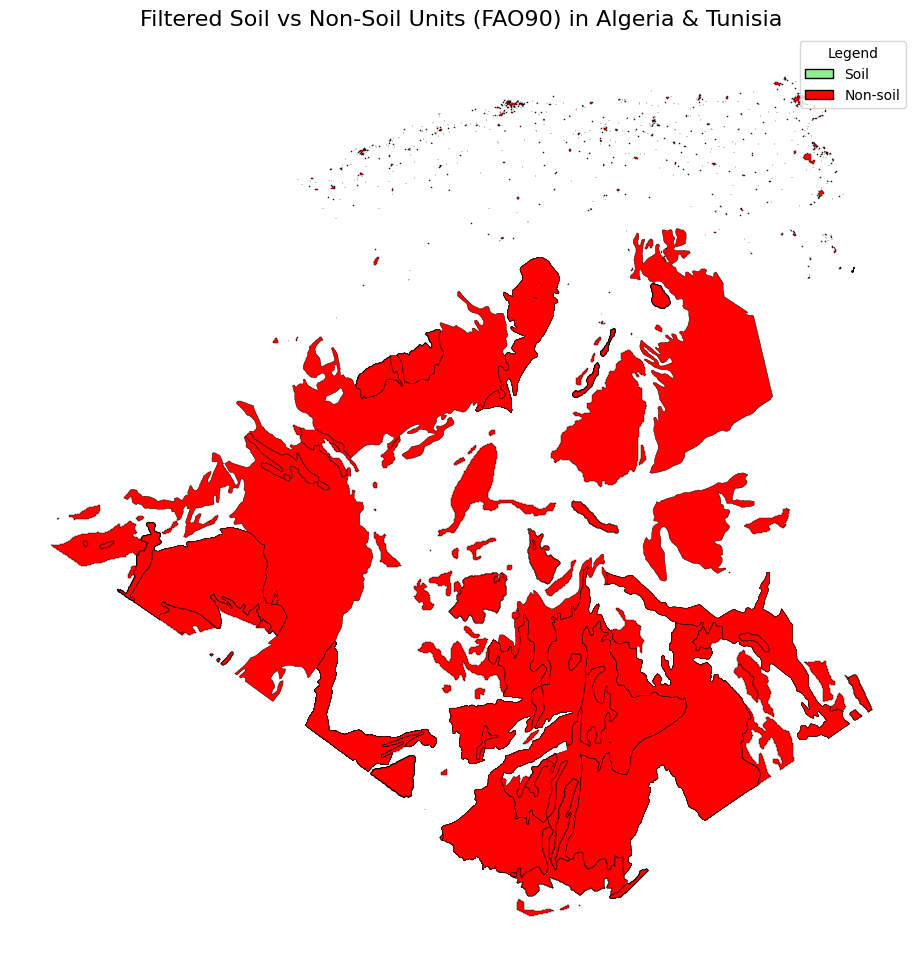

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Paths ---
shapefile_path = "/content/drive/MyDrive/data_set/soil_type/shapefiles/joined attributes/HWSD_Algeria_Tunisia_joined.shp"

# --- Load shapefile ---
gdf = gpd.read_file(shapefile_path)

# --- Your filtered DataFrame (HWSD2_SMU_ID and FAO90) ---
# filtered_df = df[df['HWSD2_SMU_ID'].isin(unique_hwsd_ids)][['HWSD2_SMU_ID', 'FAO90']]

# --- Merge shapefile with filtered_df to keep only those IDs ---
merged_gdf = gdf.merge(filtered_df, left_on='ID', right_on='HWSD2_SMU_ID', how='inner')

# --- Define non-soil FAO90 codes ---
non_soil_codes = ['DS', 'FP', 'GG', 'HD', 'IS', 'RK', 'ST', 'UR', 'WR']

# --- Classify polygons ---
merged_gdf['is_non_soil'] = merged_gdf['FAO90'].isin(non_soil_codes)

# --- Split by type ---
non_soil_gdf = merged_gdf[merged_gdf['is_non_soil']]
soil_gdf = merged_gdf[~merged_gdf['is_non_soil']]

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 12))
soil_gdf.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3)
non_soil_gdf.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3)

ax.set_title("Filtered Soil vs Non-Soil Units (FAO90) in Algeria & Tunisia", fontsize=16)
ax.axis('off')

# --- Create manual legend ---
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='Soil'),
    Patch(facecolor='red', edgecolor='black', label='Non-soil')
]
ax.legend(handles=legend_elements, title="Legend")

plt.show()


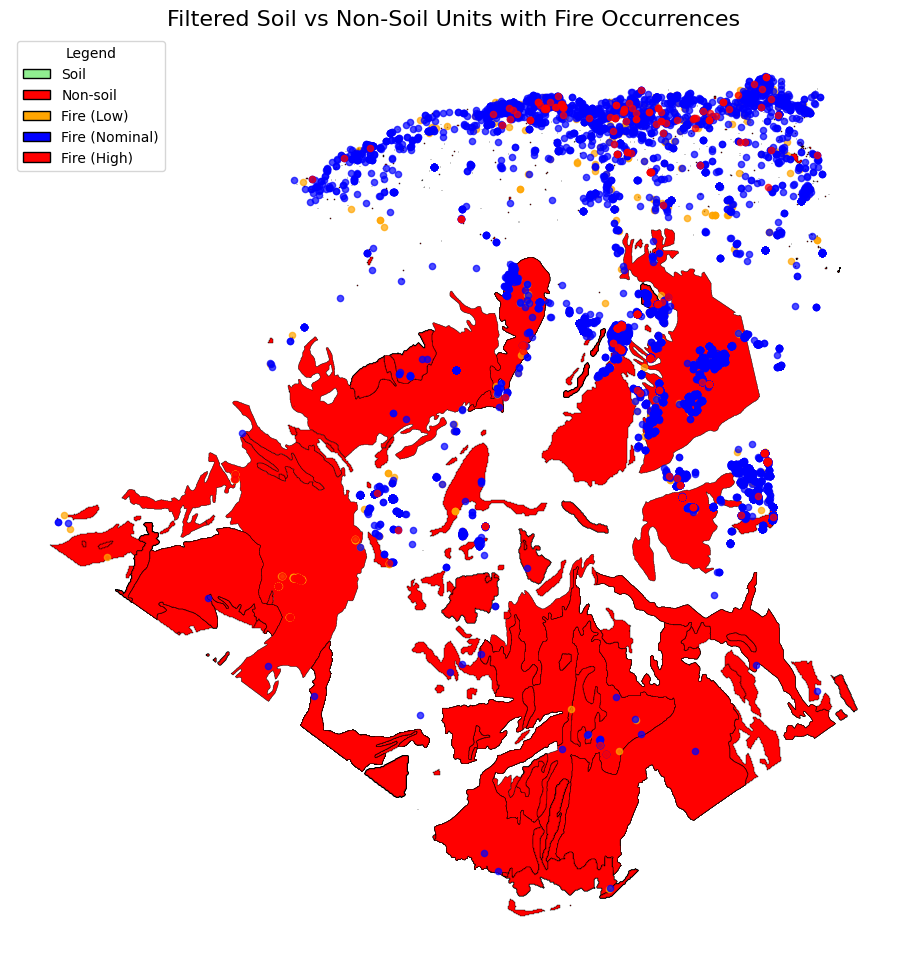

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point

# --- Paths ---

shapefile_path = "/content/drive/MyDrive/data_set/soil_type/shapefiles/joined attributes/HWSD_Algeria_Tunisia_joined.shp"
fire_csv_path = "/content/drive/MyDrive/data_set/fire/fire_vege.csv"

# --- Load shapefile ---

gdf = gpd.read_file(shapefile_path)

# --- Merge with filtered DataFrame ---

merged_gdf = gdf.merge(filtered_df, left_on='ID', right_on='HWSD2_SMU_ID', how='inner')

# --- Classify non-soil ---

non_soil_codes =  ['DS', 'FP', 'GG', 'HD', 'IS', 'RK', 'ST', 'UR', 'WR']
merged_gdf['is_non_soil'] = merged_gdf['FAO90'].isin(non_soil_codes)

soil_gdf = merged_gdf[~merged_gdf['is_non_soil']]
non_soil_gdf = merged_gdf[merged_gdf['is_non_soil']]

# --- Load fire CSV ---

fire_df = pd.read_csv(fire_csv_path)  # should contain columns 'longitude', 'latitude', 'confidence'

# Convert to GeoDataFrame

fire_gdf = gpd.GeoDataFrame(
fire_df,
geometry=[Point(xy) for xy in zip(fire_df['longitude'], fire_df['latitude'])],
crs="EPSG:4326"
)

# Reproject to match soil shapefile CRS

if fire_gdf.crs != merged_gdf.crs:
  fire_gdf = fire_gdf.to_crs(merged_gdf.crs)

# --- Define colors for confidence levels ---

confidence_colors = {'l': 'orange', 'n': 'blue', 'h': 'red'}
fire_gdf['color'] = fire_gdf['confidence'].map(confidence_colors)

# --- Plot ---

fig, ax = plt.subplots(figsize=(12, 12))
soil_gdf.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3)
non_soil_gdf.plot(ax=ax, color='red', edgecolor='black', linewidth=0.3)

# Plot fire points by confidence

for conf_level, color in confidence_colors.items():
  subset = fire_gdf[fire_gdf['confidence'] == conf_level]
  subset.plot(ax=ax, color=color, markersize=20, label=f'Fire ({conf_level})', alpha=0.7)

ax.set_title("Filtered Soil vs Non-Soil Units with Fire Occurrences", fontsize=16)
ax.axis('off')

# --- Legend ---

legend_elements = [
Patch(facecolor='lightgreen', edgecolor='black', label='Soil'),
Patch(facecolor='red', edgecolor='black', label='Non-soil'),
Patch(facecolor='orange', edgecolor='black', label='Fire (Low)'),
Patch(facecolor='blue', edgecolor='black', label='Fire (Nominal)'),
Patch(facecolor='red', edgecolor='black', label='Fire (High)')
]
ax.legend(handles=legend_elements, title="Legend")

plt.show()


# Elevation

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 45.5 MB/s eta 0:00:00


### Elevation

Number of NoData pixels: 8989631


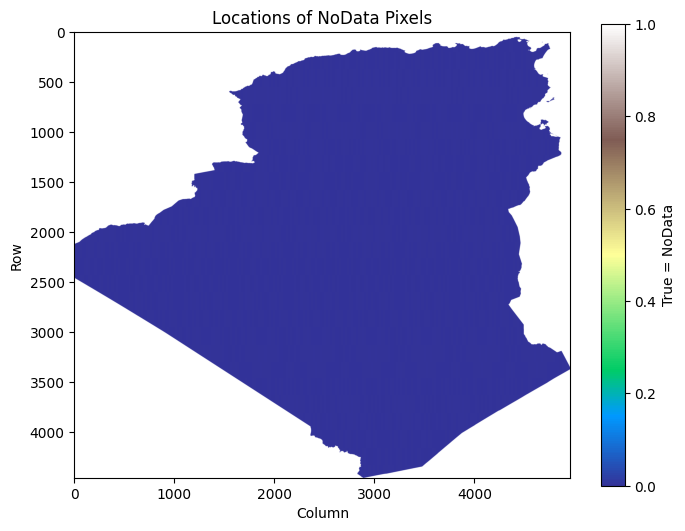

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# --- Path to the raster file ---
raster_path = "/content/drive/MyDrive/data_set/Elevation/clipped_algeria_tunisia.tif"

# --- Open the raster ---
with rasterio.open(raster_path) as src:
    band = src.read(1).astype(float)  # convert to float

# --- Create mask for NoData pixels ---
band[band == -32768] = np.nan  # replace NoData with NaN
nodata_mask = np.isnan(band)   # True where NoData

# --- Print info ---
print(f"Number of NoData pixels: {np.sum(nodata_mask)}")

# --- Display mask ---
plt.figure(figsize=(8,6))
plt.imshow(nodata_mask, cmap='terrain')
plt.title("Locations of NoData Pixels")
plt.xlabel("Column")
plt.ylabel("Row")
plt.colorbar(label="True = NoData")
plt.show()


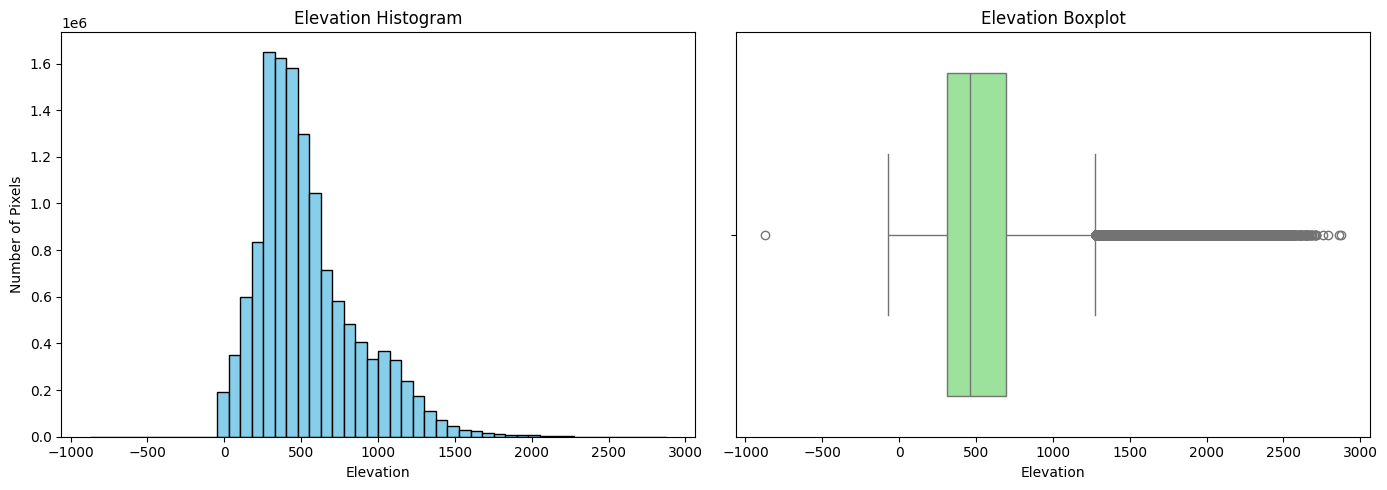

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to clipped raster
raster_path = "/content/drive/MyDrive/data_set/Elevation/clipped_algeria_tunisia.tif"

# Open raster
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)
    nodata_value = src.nodata

# Mask nodata values
valid_pixels = raster_data[raster_data != nodata_value]

# Set up the figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Histogram
axes[0].hist(valid_pixels, bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Elevation")
axes[0].set_ylabel("Number of Pixels")
axes[0].set_title("Elevation Histogram")

# Boxplot
sns.boxplot(x=valid_pixels, ax=axes[1], color='lightgreen')
axes[1].set_xlabel("Elevation")
axes[1].set_title("Elevation Boxplot")

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Orientation (Aspect)

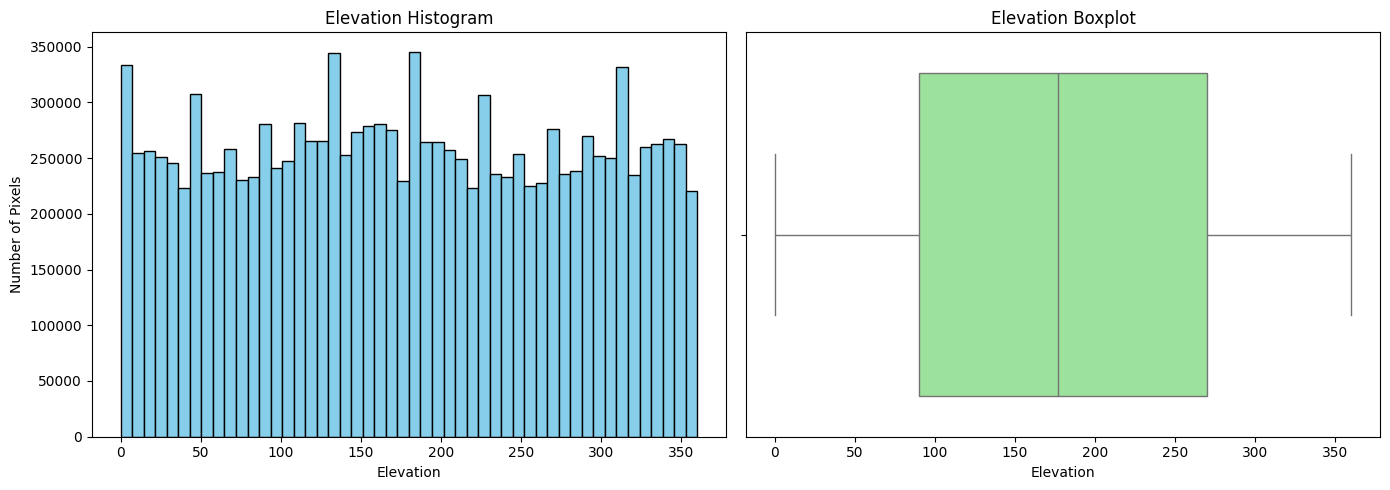

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Path to clipped raster
raster_path = "/content/drive/MyDrive/data_set/Elevation/Aspect.tif"

# Open raster
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)
    nodata_value = src.nodata

# Mask nodata values
valid_pixels = raster_data[raster_data != nodata_value]

# Set up the figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Histogram
axes[0].hist(valid_pixels, bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel("Elevation")
axes[0].set_ylabel("Number of Pixels")
axes[0].set_title("Elevation Histogram")

# Boxplot
sns.boxplot(x=valid_pixels, ax=axes[1], color='lightgreen')
axes[1].set_xlabel("Elevation")
axes[1].set_title("Elevation Boxplot")

plt.tight_layout()
plt.show()


### Outliers

Smallest valid pixel value: -872.0
Pixel 0: lon=7.995694444444297, lat=29.47486111111104


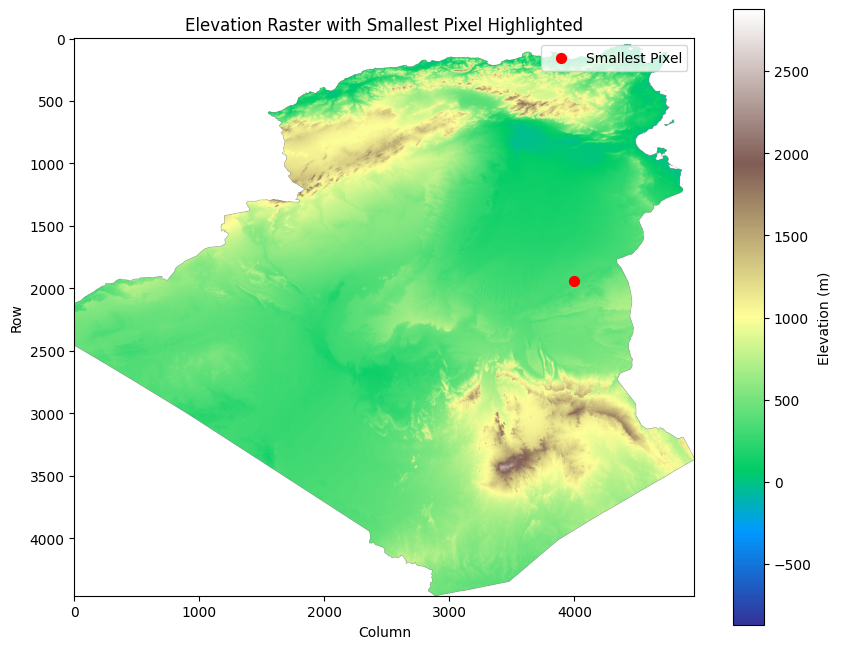

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to raster
raster_path = "/content/drive/MyDrive/data_set/Elevation/clipped_algeria_tunisia.tif"

# Open raster
with rasterio.open(raster_path) as src:
    raster_data = src.read(1)
    nodata_value = src.nodata
    transform = src.transform  # for coordinates

# Convert to float
raster_data = raster_data.astype(float)

# Mask NoData values
if nodata_value is not None:
    raster_data[raster_data == nodata_value] = np.nan

# Find smallest valid pixel
min_value = np.nanmin(raster_data)
print("Smallest valid pixel value:", min_value)

# Find its row and column
min_row, min_col = np.where(raster_data == min_value)

# Convert to geographic coordinates (lon, lat)
coords = [transform * (c, r) for r, c in zip(min_row, min_col)]
for i, (x, y) in enumerate(coords):
    print(f"Pixel {i}: lon={x}, lat={y}")

# Plot raster and mark the smallest pixel
plt.figure(figsize=(10,8))
plt.imshow(raster_data, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title("Elevation Raster with Smallest Pixel Highlighted")
plt.xlabel("Column")
plt.ylabel("Row")

# Mark the smallest pixel(s) on the map
plt.scatter(min_col, min_row, color='red', s=50, label='Smallest Pixel')
plt.legend()
plt.show()


Upper threshold for outliers: 1277.0
Lower threshold for outliers: -267.0


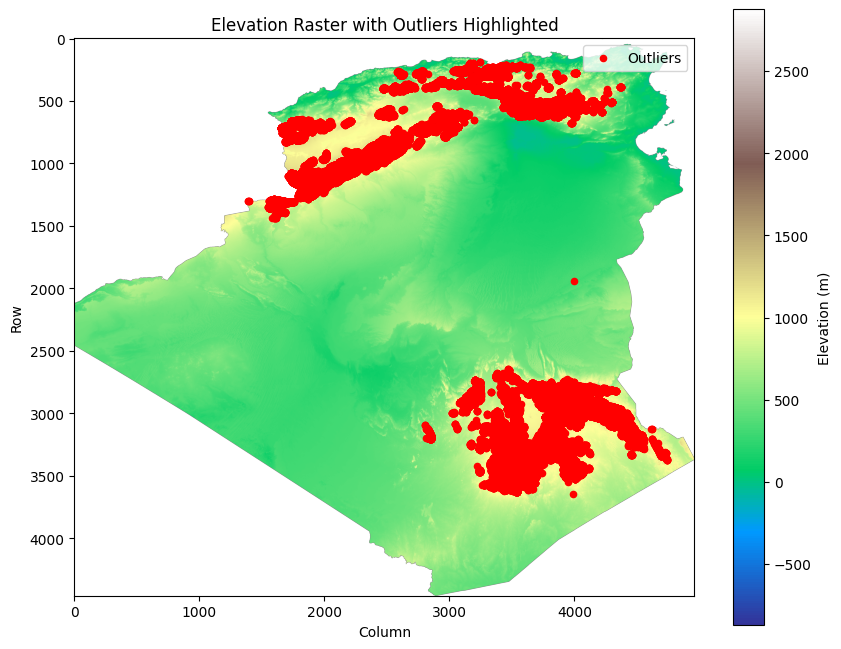

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load raster
raster_path = "/content/drive/MyDrive/data_set/Elevation/clipped_algeria_tunisia.tif"
with rasterio.open(raster_path) as src:
    raster_data = src.read(1).astype(float)
    nodata_value = src.nodata
    transform = src.transform

# Mask NoData
if nodata_value is not None:
    raster_data[raster_data == nodata_value] = np.nan

# Flatten valid pixels
valid_pixels = raster_data[~np.isnan(raster_data)]

# Compute Q1, Q3 and IQR
q1 = np.percentile(valid_pixels, 25)
q3 = np.percentile(valid_pixels, 75)
iqr = q3 - q1

# Define outliers (above Q3 + 1.5*IQR or below Q1 - 1.5*IQR)
upper_thresh = q3 + 1.5*iqr
lower_thresh = q1 - 1.5*iqr

print("Upper threshold for outliers:", upper_thresh)
print("Lower threshold for outliers:", lower_thresh)

# Find outlier pixels
outlier_rows, outlier_cols = np.where((raster_data > upper_thresh) | (raster_data < lower_thresh))
plt.figure(figsize=(10,8))
plt.imshow(raster_data, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title("Elevation Raster with Outliers Highlighted")
plt.xlabel("Column")
plt.ylabel("Row")

# Mark outliers
plt.scatter(outlier_cols, outlier_rows, color='red', s=20, label='Outliers')
plt.legend()
plt.show()


# Land Cover

In [ ]:
import geopandas as gpd

shapefile_path = "/content/drive/MyDrive/data_set/landcover/land_cover_dzd_tun/dzd_tun_landcover.shp"
gdf = gpd.read_file(shapefile_path)
# deja fait cette transformation
gdf["AREA"] = gdf["AREA"] / 1_000_000
output_path = "/content/drive/MyDrive/data_set/landcover/land_cover_dzd_tun/dzd_tun_landcover.shp"
gdf.to_file(output_path)
print(gdf.head(10))
# ON A VERFIER DEJA LES SURFACE SONT EN MÈTRE 2 POUR LES DEUX DATA SET

   ID  GRIDCODE        AREA       LCCCODE   source  \
0   4       210    6.228187  7001 // 8001  Algeria   
1   2       210    6.242408  7001 // 8001  Algeria   
2   1       210    1.482995  7001 // 8001  Algeria   
3   8        50  459.084148  21497-121340  Algeria   
4  13       210    6.371533  7001 // 8001  Algeria   
5   3        50   13.081721  21497-121340  Algeria   
6  14       130    1.903570         21450  Algeria   
7  17        50    0.369168  21497-121340  Algeria   
8   6       210    5.305624  7001 // 8001  Algeria   
9  24        30    0.228421  0004 // 0003  Algeria   

                                            geometry  
0  POLYGON ((6.41528 37.08696, 6.43103 37.0855, 6...  
1  POLYGON ((7.18084 37.07917, 7.17998 37.08091, ...  
2  POLYGON ((7.37137 37.08194, 7.3709 37.08717, 7...  
3  POLYGON ((6.12361 36.68472, 6.12361 36.69306, ...  
4  POLYGON ((6.26181 37.02361, 6.26193 37.02514, ...  
5  POLYGON ((7.20417 37.05972, 7.20972 37.05972, ...  
6  POLYGON ((6.44583

In [ ]:
missing_counts = gdf.isna().sum()
print("📊 Valeurs manquantes par colonne :")
print(missing_counts)

# Extraire les lignes où il y a au moins une valeur manquante
rows_with_missing = gdf[gdf.isna().any(axis=1)]
print(f"🔎 Nombre de lignes avec des valeurs manquantes : {len(rows_with_missing)}")
display(rows_with_missing.head())


📊 Valeurs manquantes par colonne :
ID          0
GRIDCODE    0
AREA        0
LCCCODE     0
source      0
geometry    0
dtype: int64
🔎 Nombre de lignes avec des valeurs manquantes : 0


Empty GeoDataFrame
Columns: [ID, GRIDCODE, AREA, LCCCODE, source, geometry]
Index: []

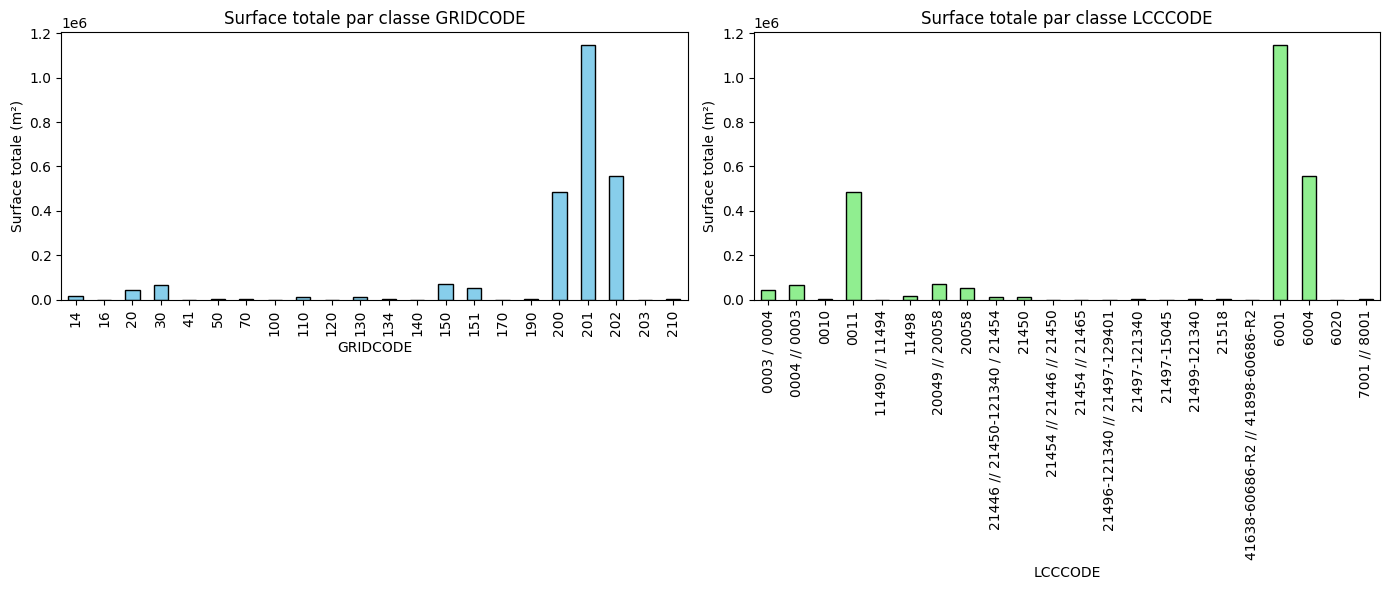

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# === Calculer la surface totale par GRIDCODE ===
surface_by_gridcode = gdf.groupby("GRIDCODE")["AREA"].sum().sort_index()

# === Calculer la surface totale par LCCCODE ===
surface_by_lcccode = gdf.groupby("LCCCODE")["AREA"].sum().sort_index()

# === Créer les deux histogrammes côte à côte ===
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogramme 1 : GRIDCODE
surface_by_gridcode.plot(kind="bar", color="skyblue", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("GRIDCODE")
axes[0].set_ylabel("Surface totale (km²)")
axes[0].set_title("Surface totale par classe GRIDCODE")

# Histogramme 2 : LCCCODE
surface_by_lcccode.plot(kind="bar", color="lightgreen", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("LCCCODE")
axes[1].set_ylabel("Surface totale (km²)")
axes[1].set_title("Surface totale par classe LCCCODE")

# Ajustement et affichage
plt.tight_layout()
plt.show()


# NDVI

In [ ]:
# l indice de vegetation: appelé Indice de Végétation par Différence Normalisée (NDVI)
# nous donne deux informations principales sur la vegetation :

# La densité : indique à quel point la surface est couverte par de la vegetation
# La santé : montre la vitalité de la vegetation.

# Le jeu de données (dataset) est calculé à partir d’images satellites
# Le principe est le suivant :
# quand une plante est en bonne santé, elle absorbe beaucoup de lumière rouge et reflète beaucoup de lumière infrarouge (par nature des feuilles).
# si le satellite voit peu de lumière rouge et beaucoup d’infrarouge, cela signifie que la végétation est saine et dense.
# Au contraire, s’il voit beaucoup de rouge et peu d’infrarouge, cela indique peu ou pas de végétation, ou bien une végétation sèche ou malade.

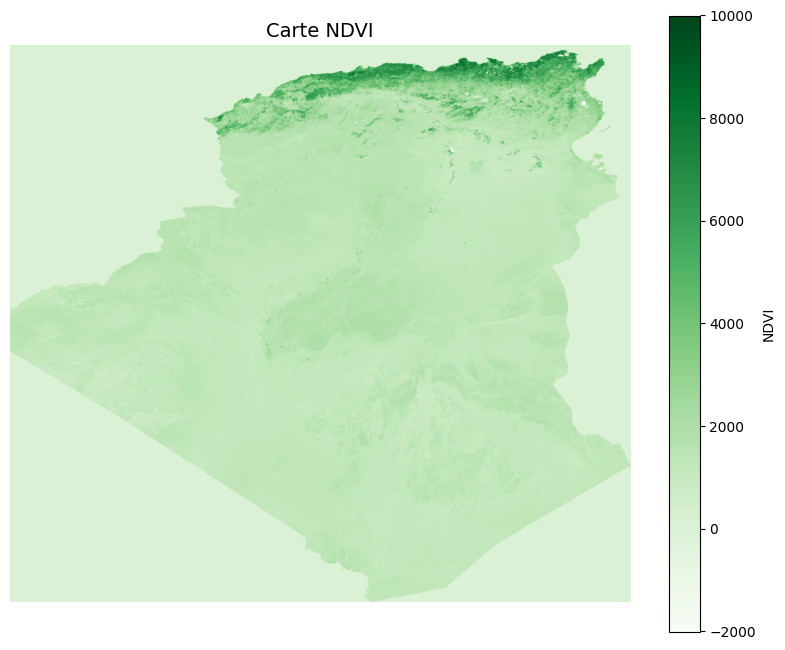

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# === Chemin vers ton fichier NDVI ===
fichier = "/content/drive/MyDrive/data_set/NDVI/NDVI.tif"

# === Lecture du raster ===
with rasterio.open(fichier) as src:
    ndvi = src.read(1)  # lire la première bande

# === Affichage simple ===
plt.figure(figsize=(10, 8))
plt.imshow(ndvi, cmap='Greens')
plt.colorbar(label="NDVI")
plt.title("Carte NDVI", fontsize=14)
plt.axis('off')
plt.show()

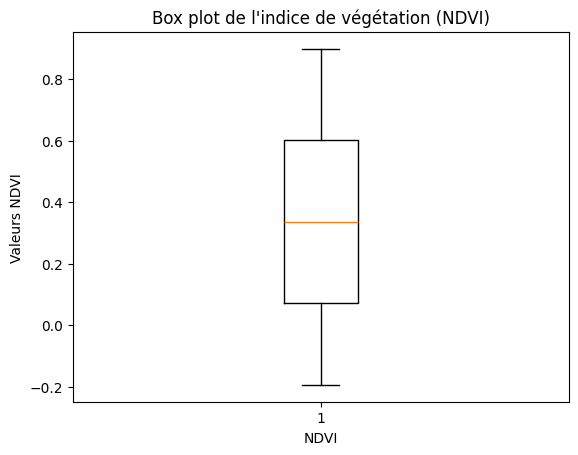

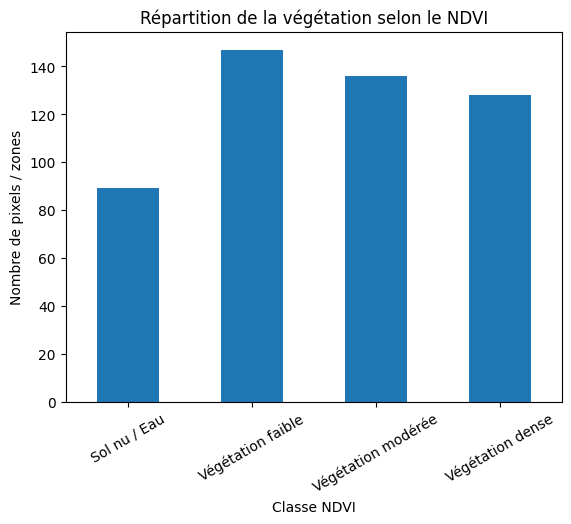

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# Exemple de données NDVI
# (remplace cette partie par ton dataset)
# ===============================
np.random.seed(0)
df = pd.DataFrame({
    "NDVI": np.random.uniform(-0.2, 0.9, 500)
})

# ===============================
# 1) BOX PLOT DU NDVI
# ===============================
plt.figure()
plt.boxplot(df["NDVI"])
plt.title("Box plot de l'indice de végétation (NDVI)")
plt.ylabel("Valeurs NDVI")
plt.xlabel("NDVI")
plt.show()

# ===============================
# 2) BAR CHART : NDVI par classes
# ===============================
# Définition des classes NDVI
bins = [-1, 0, 0.3, 0.6, 1]
labels = [
    "Sol nu / Eau",
    "Végétation faible",
    "Végétation modérée",
    "Végétation dense"
]

df["NDVI_class"] = pd.cut(df["NDVI"], bins=bins, labels=labels)

# Comptage par classe
counts = df["NDVI_class"].value_counts().sort_index()

plt.figure()
counts.plot(kind="bar")
plt.title("Répartition de la végétation selon le NDVI")
plt.xlabel("Classe NDVI")
plt.ylabel("Nombre de pixels / zones")
plt.xticks(rotation=30)
plt.show()


#Climate

-> fusion tmin, tmax, precipitation

In [ ]:
import os
import glob
import numpy as np
import rasterio
from rasterio import features
from shapely.geometry import shape, mapping
import geopandas as gpd


In [ ]:
root_folder = "/content/drive/MyDrive/data_set/climate/algeria_tunisia_climate"

# 🔹 Lister les fichiers
tmin_files = sorted(glob.glob(os.path.join(root_folder, "tmin", "*.tif")))
tmax_files = sorted(glob.glob(os.path.join(root_folder, "tmax", "*.tif")))
prec_files = sorted(glob.glob(os.path.join(root_folder, "precipitation", "*.tif")))

print(f"Tmin: {len(tmin_files)}, Tmax: {len(tmax_files)}, Prec: {len(prec_files)}")

# Vérification
assert len(tmin_files) == 12
assert len(tmax_files) == 12
assert len(prec_files) == 12

Tmin: 12, Tmax: 12, Prec: 12


In [ ]:
# 🔹 Liste pour stocker les résultats
features_list = []

# 🔹 Boucle sur les 12 mois
for month in range(12):
    print(f"🔄 Traitement du mois {month+1}...")

    # Lire les rasters correspondants
    with rasterio.open(tmin_files[month]) as src_tmin, \
         rasterio.open(tmax_files[month]) as src_tmax, \
         rasterio.open(prec_files[month]) as src_prec:

        tmin = src_tmin.read(1)
        tmax = src_tmax.read(1)
        prec = src_prec.read(1)

        transform = src_tmin.transform
        crs = src_tmin.crs

        # On crée un "masque" (ici on garde tous les pixels valides)
        mask = ~np.isnan(tmin) & ~np.isnan(tmax) & ~np.isnan(prec)

        # Vectorisation pixel par pixel
        for geom, val in features.shapes(tmin, mask=mask, transform=transform):
            geom_shape = shape(geom)

            # Récupérer la position (row, col) du pixel à partir du centroïde
            centroid = geom_shape.centroid
            row, col = src_tmin.index(centroid.x, centroid.y)

            # Attributs du pixel
            tmin_val = float(tmin[row, col])
            tmax_val = float(tmax[row, col])
            prec_val = float(prec[row, col])

            # Ajouter à la liste
            features_list.append({
                "geometry": geom_shape,
                "month": month + 1,
                "tmin": tmin_val,
                "tmax": tmax_val,
                "precipitation": prec_val
            })


🔄 Traitement du mois 1...
🔄 Traitement du mois 2...
🔄 Traitement du mois 3...
🔄 Traitement du mois 4...
🔄 Traitement du mois 5...
🔄 Traitement du mois 6...
🔄 Traitement du mois 7...
🔄 Traitement du mois 8...
🔄 Traitement du mois 9...
🔄 Traitement du mois 10...
🔄 Traitement du mois 11...
🔄 Traitement du mois 12...


In [ ]:
# 🔹 Créer un GeoDataFrame
gdf = gpd.GeoDataFrame(features_list, crs=crs)

# 🔹 Sauvegarder le shapefile
output_shp = os.path.join(root_folder, "climate_dzd_tun_polyg.shp")
gdf.to_file(output_shp)

print(f"✅ Fichier shapefile sauvegardé : {output_shp}")
print(f"Nombre total de polygones : {len(gdf)}")

/tmp/ipython-input-3903415601.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shp)
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'precipitation' to 'precipitat'
  ogr_write(


✅ Fichier shapefile sauvegardé : /content/drive/MyDrive/data_set/climate/algeria_tunisia_climate/climate_dzd_tun_polyg.shp
Nombre total de polygones : 78929


-> analyse : missing values

In [ ]:
shapefile_path = "/content/drive/MyDrive/data_set/climate/algeria_tunisia_climate/climate_dzd_tun_polyg.shp"
gdf = gpd.read_file(shapefile_path)

In [ ]:
print(gdf.head())

   month  tmin   tmax  precipitat  \
0      1  8.50  16.50   48.075001   
1      1  8.25  16.75   42.900002   
2      1  9.00  17.00   54.349998   
3      1  8.50  17.00   49.849998   
4      1  8.75  17.00   34.150002   

                                            geometry  
0  POLYGON ((9.5 37.33333, 9.58333 37.33333, 9.58...  
1  POLYGON ((9.58333 37.33333, 9.83333 37.33333, ...  
2  POLYGON ((9.16667 37.25, 9.25 37.25, 9.25 37.1...  
3  POLYGON ((9.25 37.25, 9.41667 37.25, 9.41667 3...  
4  POLYGON ((9.91667 37.25, 10 37.25, 10 37.16667...  


In [ ]:
missing_counts = gdf.isna().sum()
print("📊 Valeurs manquantes par colonne :")
print(missing_counts)

rows_with_missing = gdf[gdf.isna().any(axis=1)]
print(f"🔎 Nombre de lignes avec des valeurs manquantes : {len(rows_with_missing)}")
display(rows_with_missing.head())


📊 Valeurs manquantes par colonne :
month         0
tmin          1
tmax          1
precipitat    1
geometry      0
dtype: int64
🔎 Nombre de lignes avec des valeurs manquantes : 1


month  tmin  tmax  precipitat  \
54383      9   NaN   NaN         NaN   

                                                geometry  
54383  POLYGON ((10.5 36.75, 10.58333 36.75, 10.58333...

-> analyse : box plot de chaque attribut

/tmp/ipython-input-762238208.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/tmp/ipython-input-762238208.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


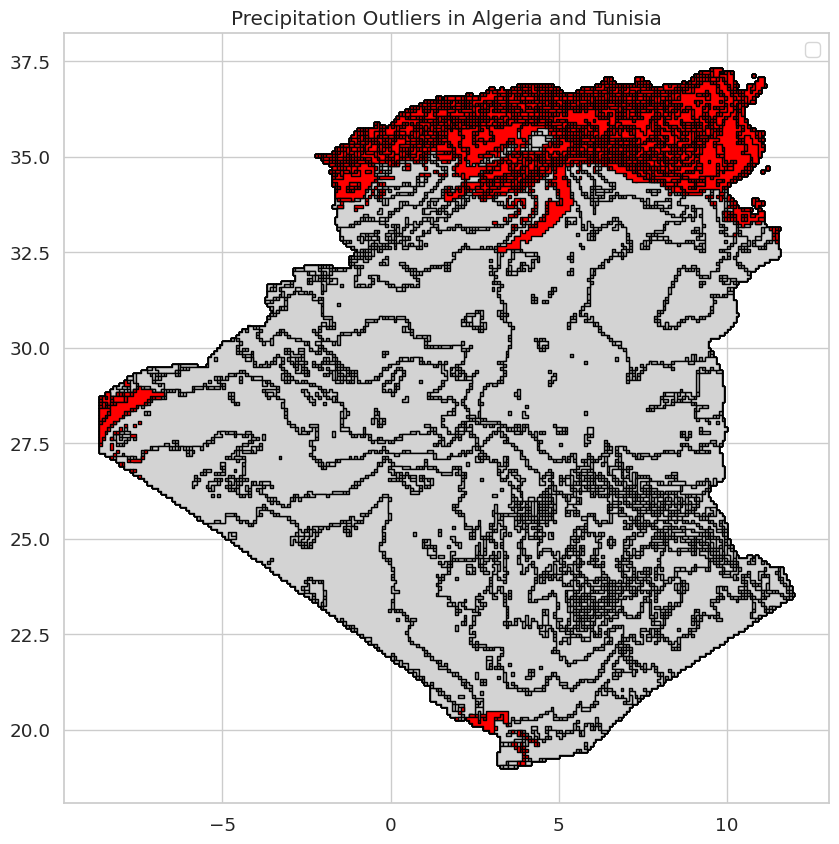

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Load shapefile ---
root_folder = "/content/drive/MyDrive/data_set/climate/algeria_tunisia_climate"
shp_file = os.path.join(root_folder, "climate_dzd_tun_polyg.shp")
gdf = gpd.read_file(shp_file)

# --- Variable to check ---
var = "precipitat"
data = gdf[var].dropna()

# --- Compute IQR for outliers ---
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# --- Identify outlier polygons ---
outlier_mask = (gdf[var] < lower_bound) | (gdf[var] > upper_bound)
outliers_gdf = gdf[outlier_mask]

# --- Plot map ---
fig, ax = plt.subplots(figsize=(10,10))

# Plot all polygons in light gray
gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Overlay precipitation outliers in red
outliers_gdf.plot(ax=ax, color='red', edgecolor='black', label='Outliers')

plt.title("Precipitation Outliers in Algeria and Tunisia")
plt.legend()
plt.show()

Colonnes du shapefile : Index(['month', 'tmin', 'tmax', 'precipitat', 'geometry'], dtype='object')


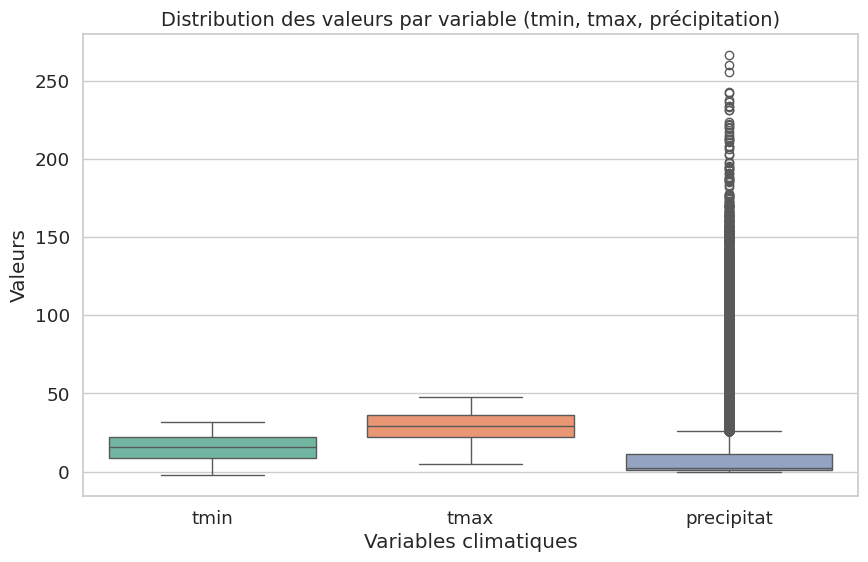

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

root_folder = "/content/drive/MyDrive/data_set/climate/algeria_tunisia_climate"
shp_file = os.path.join(root_folder, "climate_dzd_tun_polyg.shp")

# 🔹 Charger le shapefile
gdf = gpd.read_file(shp_file)

# Vérifier les colonnes
print("Colonnes du shapefile :", gdf.columns)

# 🔹 Sélectionner les variables climatiques
cols = ["tmin", "tmax", "precipitat"]

# Configuration graphique
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# 🔹 Créer les boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdf[cols])

plt.title("Distribution des valeurs par variable (tmin, tmax, précipitation)", fontsize=14)
plt.ylabel("Valeurs")
plt.xlabel("Variables climatiques")

plt.show()


In [ ]:
print(gdf.columns.tolist())

['month', 'tmin', 'tmax', 'precipitat', 'geometry']


La précipitation représente toute forme d’eau qui tombe de l’atmosphère vers le sol.

/tmp/ipython-input-3130904297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="precipitat", data=gdf, palette="coolwarm", width=0.6)


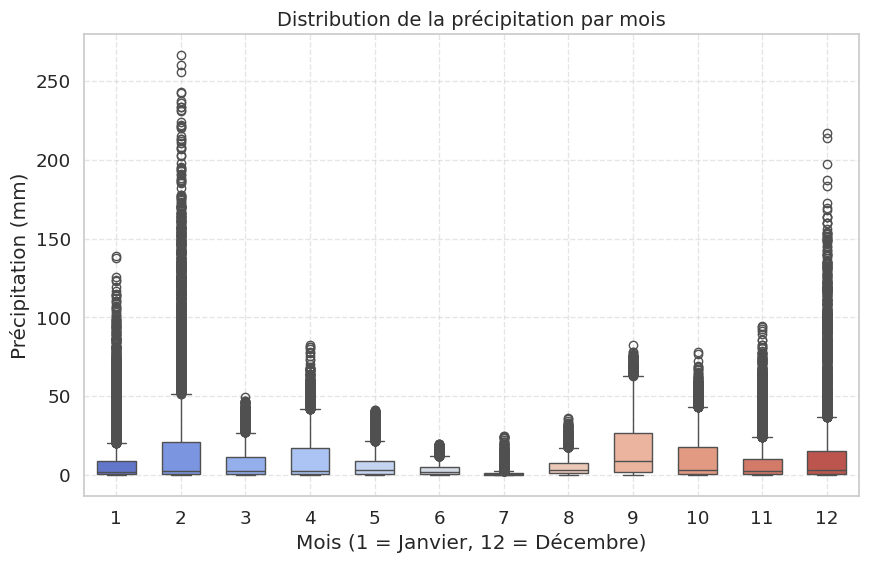

In [ ]:
# === Tracer le boxplot avec mois en chiffres ===
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="precipitat", data=gdf, palette="coolwarm", width=0.6)

plt.title("Distribution de la précipitation par mois", fontsize=14)
plt.xlabel("Mois (1 = Janvier, 12 = Décembre)")
plt.ylabel("Précipitation (mm)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd

col = "precipitat"

# Calcul des quartiles
Q1 = gdf[col].quantile(0.25)
Q3 = gdf[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détection des outliers
outliers = gdf[(gdf[col] < lower_bound) | (gdf[col] > upper_bound)]

# Afficher le nombre total d'outliers
print(f"Nombre total d'outliers pour '{col}' :", len(outliers))

# pourcentage d'outliers
print(f"Pourcentage d'outliers : {len(outliers) / len(gdf) * 100:.2f}%")

#  afficher les valeurs extrêmes
print(outliers[[col]])


Nombre total d'outliers pour 'precipitat' : 8386
Pourcentage d'outliers : 10.62%
       precipitat
0       48.075001
1       42.900002
2       54.349998
3       49.849998
4       34.150002
...           ...
75224   31.700001
75247   27.674999
75251   30.375000
75280   26.299999
75304   26.375000

[8386 rows x 1 columns]
